# ELECTRIC VEHICLEs 

# Segment Extraction - 

Over here we import all the packages that we would need.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings

In [2]:
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

# Sales Data of EV from the year 2017-2024
This data contains three columns namely the type of Electric vehicle, whether a 2-wheeler or 3-wheeler or 4-wheeler along with they year and the sales the vehicle made in that particular year.

In [3]:
data_sales = pd.read_excel("/Users/kanishka.arora/Downloads/Electric_Vehicle_Sales_Data.xlsx", sheet_name=None)

Let us see how the data looks like

In [4]:
df = data_sales['EV Industries']
df.head(15)

category financial_year  num_vehicles
0   E-2 Wheelers        2017-18          2005
1   E-2 Wheelers        2018-19         28007
2   E-2 Wheelers        2019-20         26834
3   E-2 Wheelers        2020-21         44803
4   E-2 Wheelers        2021-22        252642
5   E-2 Wheelers        2022-23        728054
6   E-2 Wheelers        2023-24        944126
7   E-3 Wheelers        2017-18         91970
8   E-3 Wheelers        2018-19        116031
9   E-3 Wheelers        2019-20        143051
10  E-3 Wheelers        2020-21         90898
11  E-3 Wheelers        2021-22        172543
12  E-3 Wheelers        2022-23        401882
13  E-3 Wheelers        2023-24        632485
14  E-4 Wheelers        2017-18          1204

Below we will display a lineplot that represents the EV and the its number growth over the years.

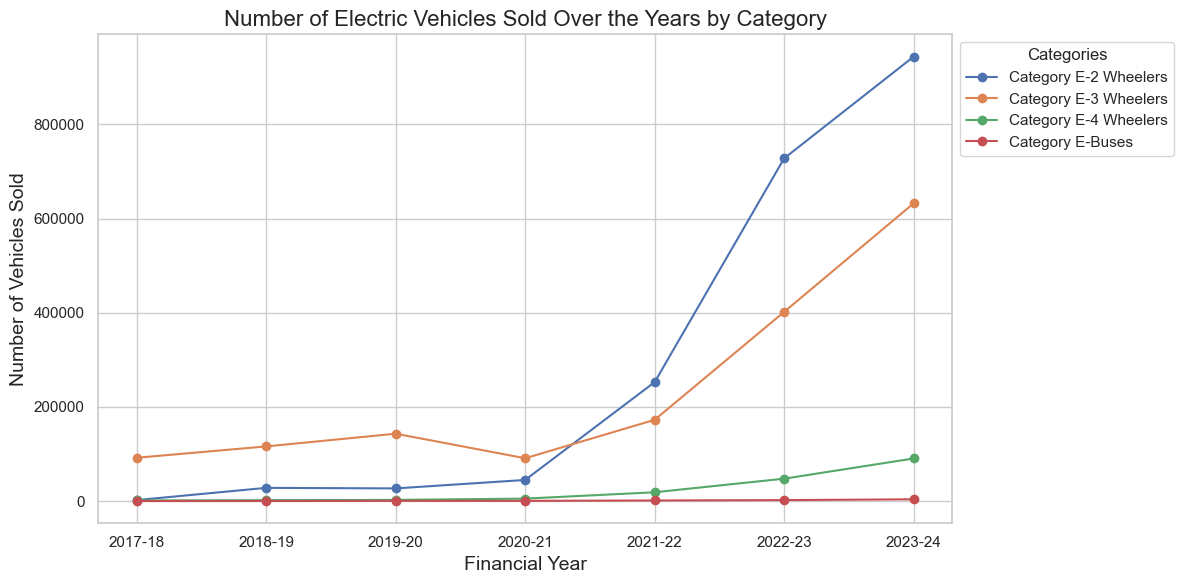

In [5]:
sns.set(style="whitegrid", context="notebook")
plt.figure(figsize=(12, 6))

categories = df['category'].unique()
for category in categories:
    data = df[df['category'] == category]
    plt.plot(data['financial_year'], data['num_vehicles'], marker='o', label=f'Category {category}')
plt.xlabel("Financial Year", fontsize=14)
plt.ylabel("Number of Vehicles Sold", fontsize=14)
plt.title("Number of Electric Vehicles Sold Over the Years by Category", fontsize=16)
plt.legend(title='Categories', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

We can see that  2 - wheeler EVs had the most number of vehicles sold over the span of many years.

The below plot will display a heatmap. This is done in order to show that the value for Electric buses is not technically zero, but rather a very small number compared to the others.

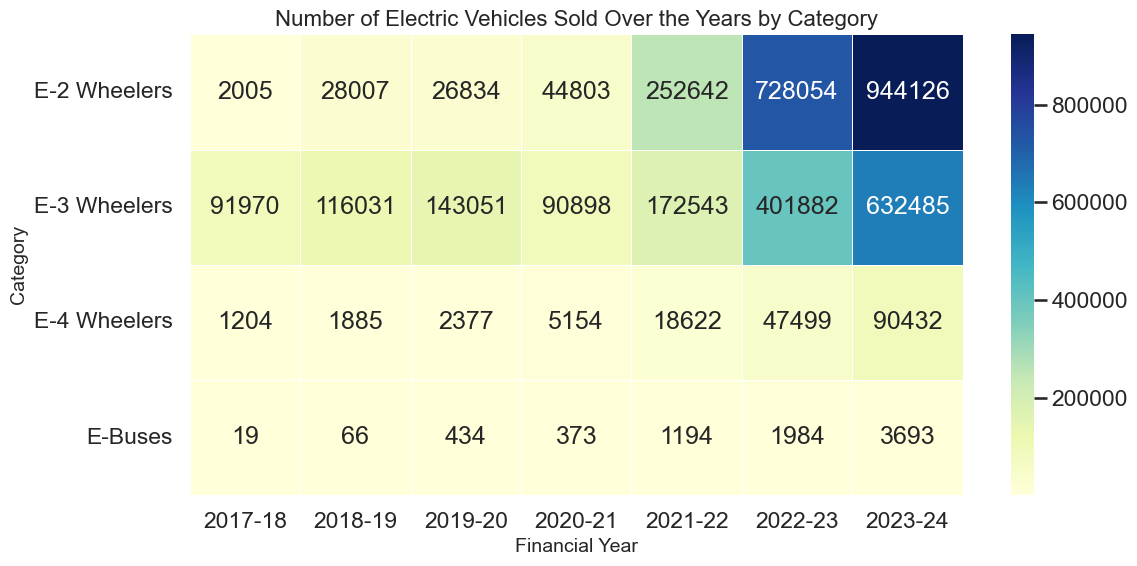

In [6]:
pivot_table = df.pivot(index='category', columns='financial_year', values='num_vehicles')

sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(12, 6))
ax = sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.xlabel("Financial Year", fontsize=14)
plt.ylabel("Category", fontsize=14)
plt.title("Number of Electric Vehicles Sold Over the Years by Category", fontsize=16)
plt.tight_layout()
plt.show()

In [7]:
data_sales['EV Market'] = data_sales['EV Market'].sort_values('Amount INR Cr', ascending = False)

The below plot will show the total sales made my each vehicle over the entire span

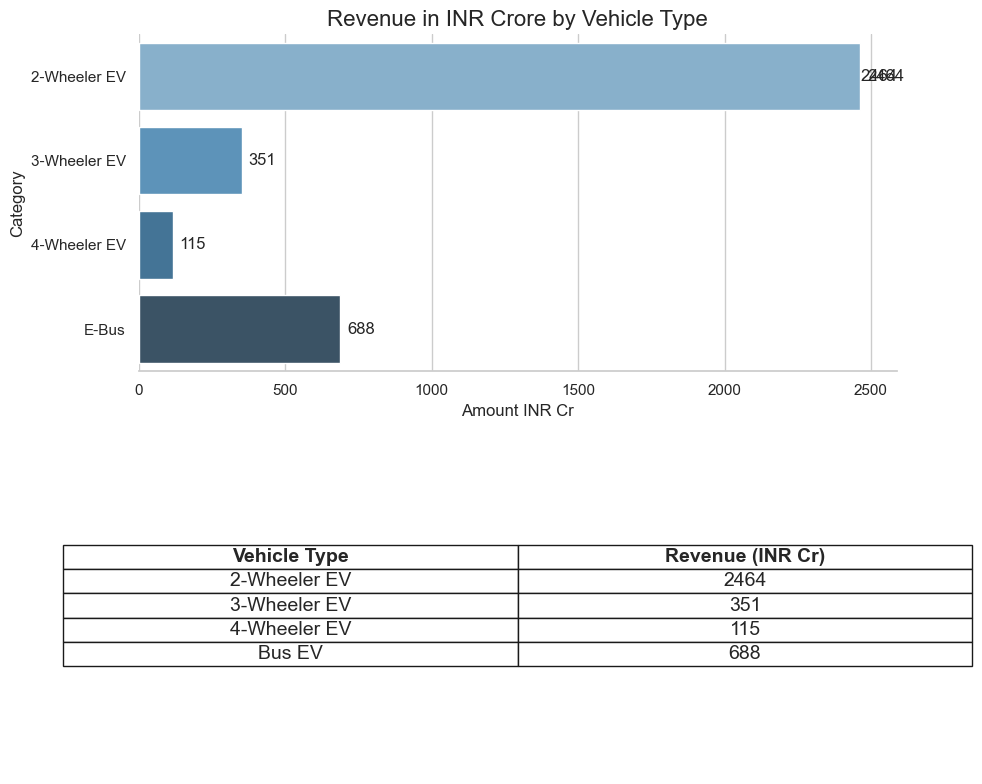

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data for demonstration purposes
data_sales = pd.DataFrame({
    'Category': ['E-2 Wheelers', 'E-3 Wheelers', 'E-4 Wheelers', 'E-Buses'],
    'Amount INR Cr': [2464, 351, 115, 688]
})

# Sort data
data_sales = data_sales.sort_values(by='Amount INR Cr')
sns.set(style="whitegrid", context="notebook")
custom_palette = sns.color_palette("Blues_d", len(data_sales))

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Bar plot
sns.barplot(data=data_sales, x='Amount INR Cr', y='Category', palette=custom_palette,
            order=['E-2 Wheelers', 'E-3 Wheelers', 'E-4 Wheelers', 'E-Buses'], ax=axs[0])
axs[0].bar_label(axs[0].containers[0], label_type='edge')  # Adding labels to the bars
axs[0].set_yticklabels(['2-Wheeler EV', '3-Wheeler EV', '4-Wheeler EV', 'E-Bus'])
axs[0].spines[['right', 'top', 'left']].set_visible(False)

for rect in axs[0].patches:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    label = f'{x_value:.0f}'
    axs[0].annotate(label, (x_value, y_value), xytext=(5, 0), textcoords="offset points", va='center', ha='left')

axs[0].set_title("Revenue in INR Crore by Vehicle Type", fontsize=16)

# Table
table_data = {
    'Vehicle Type': ['2-Wheeler EV', '3-Wheeler EV', '4-Wheeler EV', 'Bus EV'],
    'Revenue (INR Cr)': [2464, 351, 115, 688]
}

axs[1].axis('off')
axs[1].axis('tight')

table = axs[1].table(cellText=list(zip(table_data['Vehicle Type'], table_data['Revenue (INR Cr)'])),
                     colLabels=['Vehicle Type','Revenue (INR Cr)'],
                     cellLoc='center',
                     loc='center')

# Make the table header bold
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.2, 1.2)
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header
        cell.set_fontsize(14)
        cell.set_text_props(weight='bold')  # Set header text to bold

plt.tight_layout()
plt.show()


2 - wheeler EVs have generated the highest Revenue. 


In [9]:
data_2w = pd.read_excel("/Users/kanishka.arora/Downloads/Electric Vehicle 2W.xlsx", sheet_name=None)

In [10]:
dw = data_2w['Sheet1']
dw.head(26)

financial_year             maker  market_share month  num_vehicles
0         2019-20     HERO ELECTRIC          0.30   Apr          1776
1         2019-20     HERO ELECTRIC          0.30   May           455
2         2019-20     HERO ELECTRIC          0.30   Jun           329
3         2019-20     HERO ELECTRIC          0.30   Jul           260
4         2019-20     HERO ELECTRIC          0.30   Aug           249
5         2019-20     HERO ELECTRIC          0.30   Sep           245
6         2019-20     HERO ELECTRIC          0.30   Oct           541
7         2019-20     HERO ELECTRIC          0.30   Nov           859
8         2019-20     HERO ELECTRIC          0.30   Dec           459
9         2019-20     HERO ELECTRIC          0.30   Jan           616
10        2019-20     HERO ELECTRIC          0.30   Feb           648
11        2019-20     HERO ELECTRIC          0.30   Mar          1428
12        2019-20  OKINAWA AUTOTECH          0.38   Apr           928
13        2019-20  OKINAWA AUTOTECH          0.38   May           847
14        2019-20  OKINAWA AUTOTECH          0.38   Jun           688
15        2019-20  OKINAWA AUTOTECH          0.38   Jul           824
16        2019-20  OKINAWA AUTOTECH          0.38   Aug           818
17        2019-20  OKINAWA AUTOTECH          0.38   Sep           914
18        2019-20  OKINAWA AUTOTECH          0.38   Oct          1006
19        2019-20  OKINAWA AUTOTECH          0.38   Nov          1394
20        2019-20  OKINAWA AUTOTECH          0.38   Dec           762
21        2019-20  OKINAWA AUTOTECH          0.38   Jan           715
22        2019-20  OKINAWA AUTOTECH          0.38   Feb           664
23        2019-20  OKINAWA AUTOTECH          0.38   Mar           575
24        2019-20      ATHER ENERGY          0.11   Apr            28
25        2019-20      ATHER ENERGY          0.11   May           107

In [11]:
np.sort(dw['maker'].unique())

array(['AMPERE', 'AMPERE VEHICLES', 'ATHER', 'ATHER ENERGY', 'BAJAJ',
       'BEING INDIA', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'JITENDRA NEW EV', 'OKAYA EV', 'OKINAWA', 'OKINAWA AUTOTECH',
       'OLA ELECTRIC', 'OTHERS', 'PURE EV', 'REVOLT', 'TVS'], dtype=object)

In [12]:
dw['maker'] = dw['maker'].replace('AMPERE VEHICLES', 'AMPERE').replace('ATHER ENERGY', 'ATHER').replace('BEING INDIA', 'BENLING').replace('JITENDRA NEW EV', 'JITENDRA').replace('OKINAWA AUTOTECH', 'OKINAWA')
np.sort(dw['maker'].unique())

array(['AMPERE', 'ATHER', 'BAJAJ', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'OKAYA EV', 'OKINAWA', 'OLA ELECTRIC', 'OTHERS', 'PURE EV',
       'REVOLT', 'TVS'], dtype=object)

In [13]:
dw.head(26)

financial_year          maker  market_share month  num_vehicles
0         2019-20  HERO ELECTRIC          0.30   Apr          1776
1         2019-20  HERO ELECTRIC          0.30   May           455
2         2019-20  HERO ELECTRIC          0.30   Jun           329
3         2019-20  HERO ELECTRIC          0.30   Jul           260
4         2019-20  HERO ELECTRIC          0.30   Aug           249
5         2019-20  HERO ELECTRIC          0.30   Sep           245
6         2019-20  HERO ELECTRIC          0.30   Oct           541
7         2019-20  HERO ELECTRIC          0.30   Nov           859
8         2019-20  HERO ELECTRIC          0.30   Dec           459
9         2019-20  HERO ELECTRIC          0.30   Jan           616
10        2019-20  HERO ELECTRIC          0.30   Feb           648
11        2019-20  HERO ELECTRIC          0.30   Mar          1428
12        2019-20        OKINAWA          0.38   Apr           928
13        2019-20        OKINAWA          0.38   May           847
14        2019-20        OKINAWA          0.38   Jun           688
15        2019-20        OKINAWA          0.38   Jul           824
16        2019-20        OKINAWA          0.38   Aug           818
17        2019-20        OKINAWA          0.38   Sep           914
18        2019-20        OKINAWA          0.38   Oct          1006
19        2019-20        OKINAWA          0.38   Nov          1394
20        2019-20        OKINAWA          0.38   Dec           762
21        2019-20        OKINAWA          0.38   Jan           715
22        2019-20        OKINAWA          0.38   Feb           664
23        2019-20        OKINAWA          0.38   Mar           575
24        2019-20          ATHER          0.11   Apr            28
25        2019-20          ATHER          0.11   May           107

No we plot the Number of Vehicles produced by each company over the span of years. 

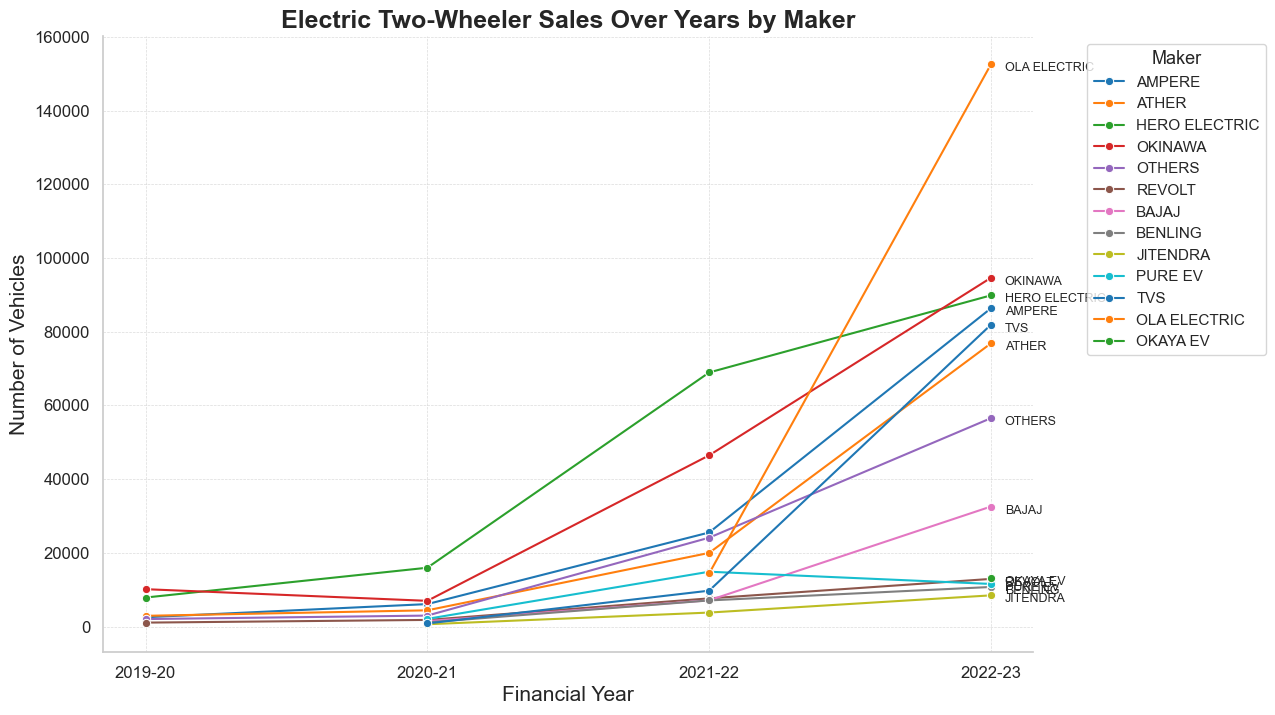

In [14]:
data_ev2w_year = dw.groupby(['financial_year', 'maker']).agg({'num_vehicles': 'sum'}).reset_index()

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=data_ev2w_year, x='financial_year', y='num_vehicles', hue='maker', marker='o', palette='tab10', ax=ax)
ax.set_xlabel("Financial Year", fontsize=15)
ax.set_ylabel("Number of Vehicles", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.title("Electric Two-Wheeler Sales Over Years by Maker", fontsize=18, fontweight='bold')

plt.legend(title='Maker', title_fontsize=13, fontsize=11, bbox_to_anchor=(1.05, 1), loc='upper left')
for maker in data_ev2w_year['maker'].unique():
    last_point = data_ev2w_year[data_ev2w_year['maker'] == maker].iloc[-1]
    plt.annotate(f"{last_point['maker']}", 
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5), 
                 ha='left', fontsize=9,)
ax.spines[['right', 'top']].set_visible(False)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

We can see that OLA ELECTRIC takes the lead

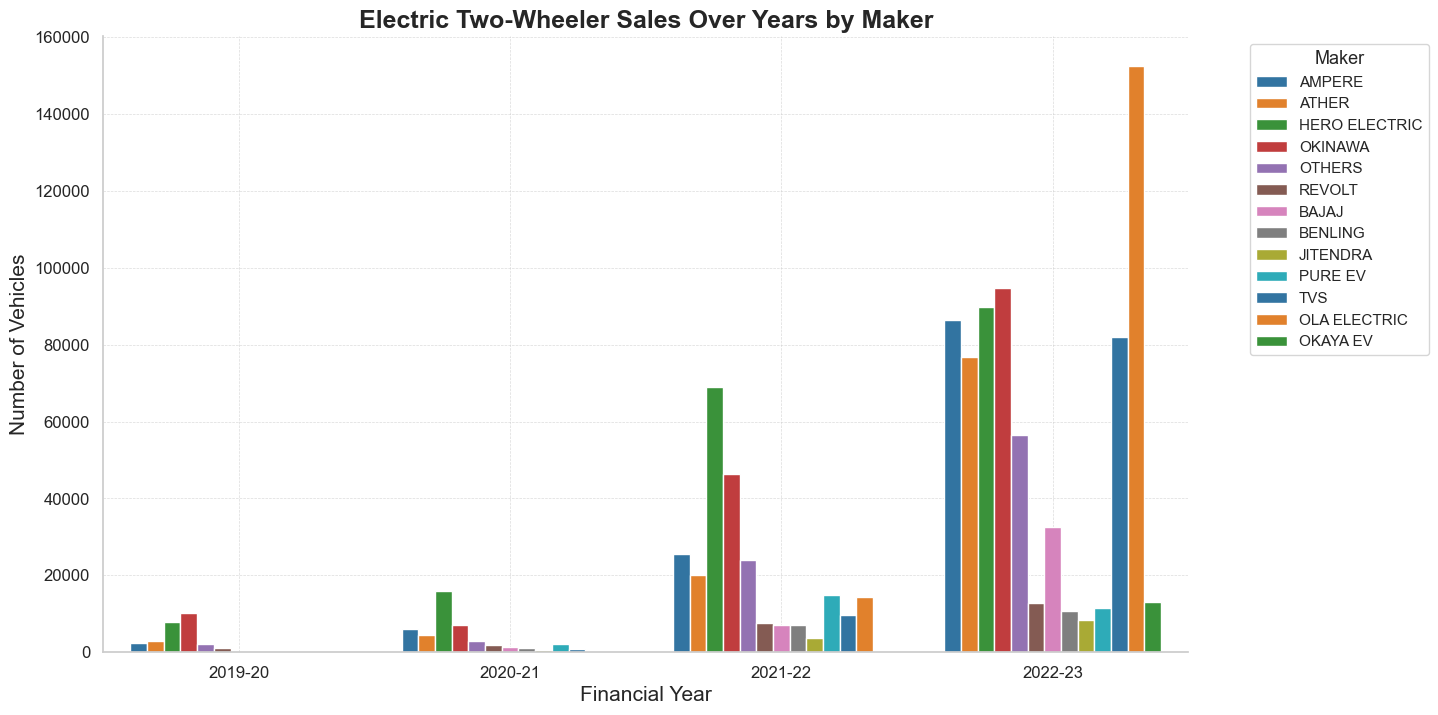

In [15]:
data_ev2w_year = dw.groupby(['financial_year', 'maker']).agg({'num_vehicles': 'sum'}).reset_index()
fig, ax = plt.subplots(figsize=(14, 8))

sns.barplot(data=data_ev2w_year, x='financial_year', y='num_vehicles', hue='maker', palette='tab10', ax=ax)
ax.set_xlabel("Financial Year", fontsize=15)
ax.set_ylabel("Number of Vehicles", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.title("Electric Two-Wheeler Sales Over Years by Maker", fontsize=18, fontweight='bold')
plt.legend(title='Maker', title_fontsize=13, fontsize=11, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.spines[['right', 'top']].set_visible(False)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


Hence we observe that OLA ELECTRIC takes the lead

#### Hence we observe that 2-wheeler EV segment had the highest revenue and sales. Hence we dive into its study.

# EV Market Segmentation

* The dataset used for the market segmentation analysis, extracted from bikewale.com, comprises electric two-wheeler customer reviews, offering vital behavioral and psychographic insights.
* It also presents detailed technical specifications and pricing information of electric two-wheelers. This data allowed us to assess the technical feasibility and price points crucial for our market segmentation strategy


We extract data from 2 csv files and merge them to have a proper data file with the customer reviews and the vehicle information as well.

The below file contains the customer data.

In [16]:
data_review = pd.read_csv("/Users/kanishka.arora/Downloads/2 wheeler review.csv")

The below will give you an idea about the columns and the type of information stored in the csv file.

In [17]:
data_review.head(11)

Review   Usage Information  \
0   We all checked the bike's capacity to be 150 k...       Daily Commute   
1   Performance is very poor on this bike. The cha...          Everything   
2   I purchased this in April 2022 and the sales s...       Daily Commute   
3   If any issues come in scooty parts not availab...       Daily Commute   
4   Don't buy this vehicle unless you have a near ...       Daily Commute   
5   First 7k kms no issues.\nLater rear wheel had ...       Daily Commute   
6   The tvs iqube is supposed to be a game changer...  Occasional Commute   
7   I brought iqube in march 2021 used for about 1...       Daily Commute   
8   Buying experience - Chennai on road price is 1...       Daily Commute   
9   Hello,\nI purchased tvs iqube in march 2021, i...       Daily Commute   
10  I have used jupiter and activa both. But this ...       Daily Commute   

   Duration of Ownership      Ridden for  Rating  Visual Appeal  Reliability  \
0            Never owned             NaN       1            3.0          4.0   
1                 > 1 yr      < 5000 kms       1            3.0          1.0   
2             < 3 months      < 5000 kms       3            4.0          4.0   
3          6 months-1 yr  5000-10000 kms       1            1.0          1.0   
4          6 months-1 yr      < 5000 kms       1            3.0          4.0   
5                 > 1 yr  5000-10000 kms       1            5.0          1.0   
6          6 months-1 yr      < 5000 kms       3            3.0          2.0   
7             < 3 months      < 5000 kms       1            3.0          1.0   
8             < 3 months      < 5000 kms       3            3.0          3.0   
9             3-6 months      < 5000 kms       2            5.0          3.0   
10         6 months-1 yr      < 5000 kms       5            5.0          5.0   

    Performance  Service Experience  Extra Features  Comfort  \
0           NaN                 NaN             NaN      4.0   
1           NaN                 1.0             NaN      3.0   
2           NaN                 2.0             NaN      5.0   
3           NaN                 1.0             NaN      1.0   
4           NaN                 1.0             NaN      3.0   
5           NaN                 1.0             NaN      5.0   
6           NaN                 2.0             NaN      4.0   
7           NaN                 1.0             NaN      2.0   
8           NaN                 3.0             NaN      4.0   
9           NaN                 1.0             NaN      4.0   
10          NaN                 5.0             NaN      5.0   

    Maintenance cost  Value for Money Model Name  
0                NaN              1.0  TVS iQube  
1                NaN              3.0  TVS iQube  
2                NaN              2.0  TVS iQube  
3                NaN              1.0  TVS iQube  
4                NaN              2.0  TVS iQube  
5                NaN              2.0  TVS iQube  
6                NaN              3.0  TVS iQube  
7                NaN              1.0  TVS iQube  
8                NaN              3.0  TVS iQube  
9                NaN              3.0  TVS iQube  
10               NaN              5.0  TVS iQube

The below csv file has information about vehicle data

In [18]:
data_ev_specification = pd.read_csv("/Users/kanishka.arora/Downloads/ev_model_spec.csv")

In [19]:
data_ev_specification.head(11)

Model Name   Price  Riding Range (km)  Top Speed (kmph)  \
0     Ampere Magnus EX  104758                121                53   
1    Ampere Magnus Pro   66053                 45                25   
2           Ampere REO   61993                 45                25   
3          Ampere Zeal   96544                120                53   
4           Ather 450X  135489                111                90   
5         Bajaj Chetak  131196                 90                63   
6         Benling Aura   91667                120                60   
7            BGauss B8   62999                 70                50   
8   Bounce Infinity E1  100905                 85                65   
9       e-bike Gen Nxt   74273                 60                25   
10         Evolet Polo   55799                 90                25   

    Weight (kg)  Battery Charging Time (hrs)  Rated Power (W)  
0            90                            7             1200  
1            94                           10              250  
2            88                           10              250  
3            80                            7             1200  
4           108                            8             3000  
5           133                            5             3800  
6            66                            6             2500  
7            99                            8              800  
8            94                            4             1500  
9            67                            4              250  
10           76                            4              250

The below will merge the 2 files on the basis of the common column "Model Name". So, the merge function will create a new DataFrame by combining data_review with data_ev_specification based on the 'Model Name' column, keeping all the rows from data_bw and adding corresponding rows from data_ev_specification where there is a match. If there are no matches, the resulting DataFrame will have NaN values for columns from data_ev_specification.

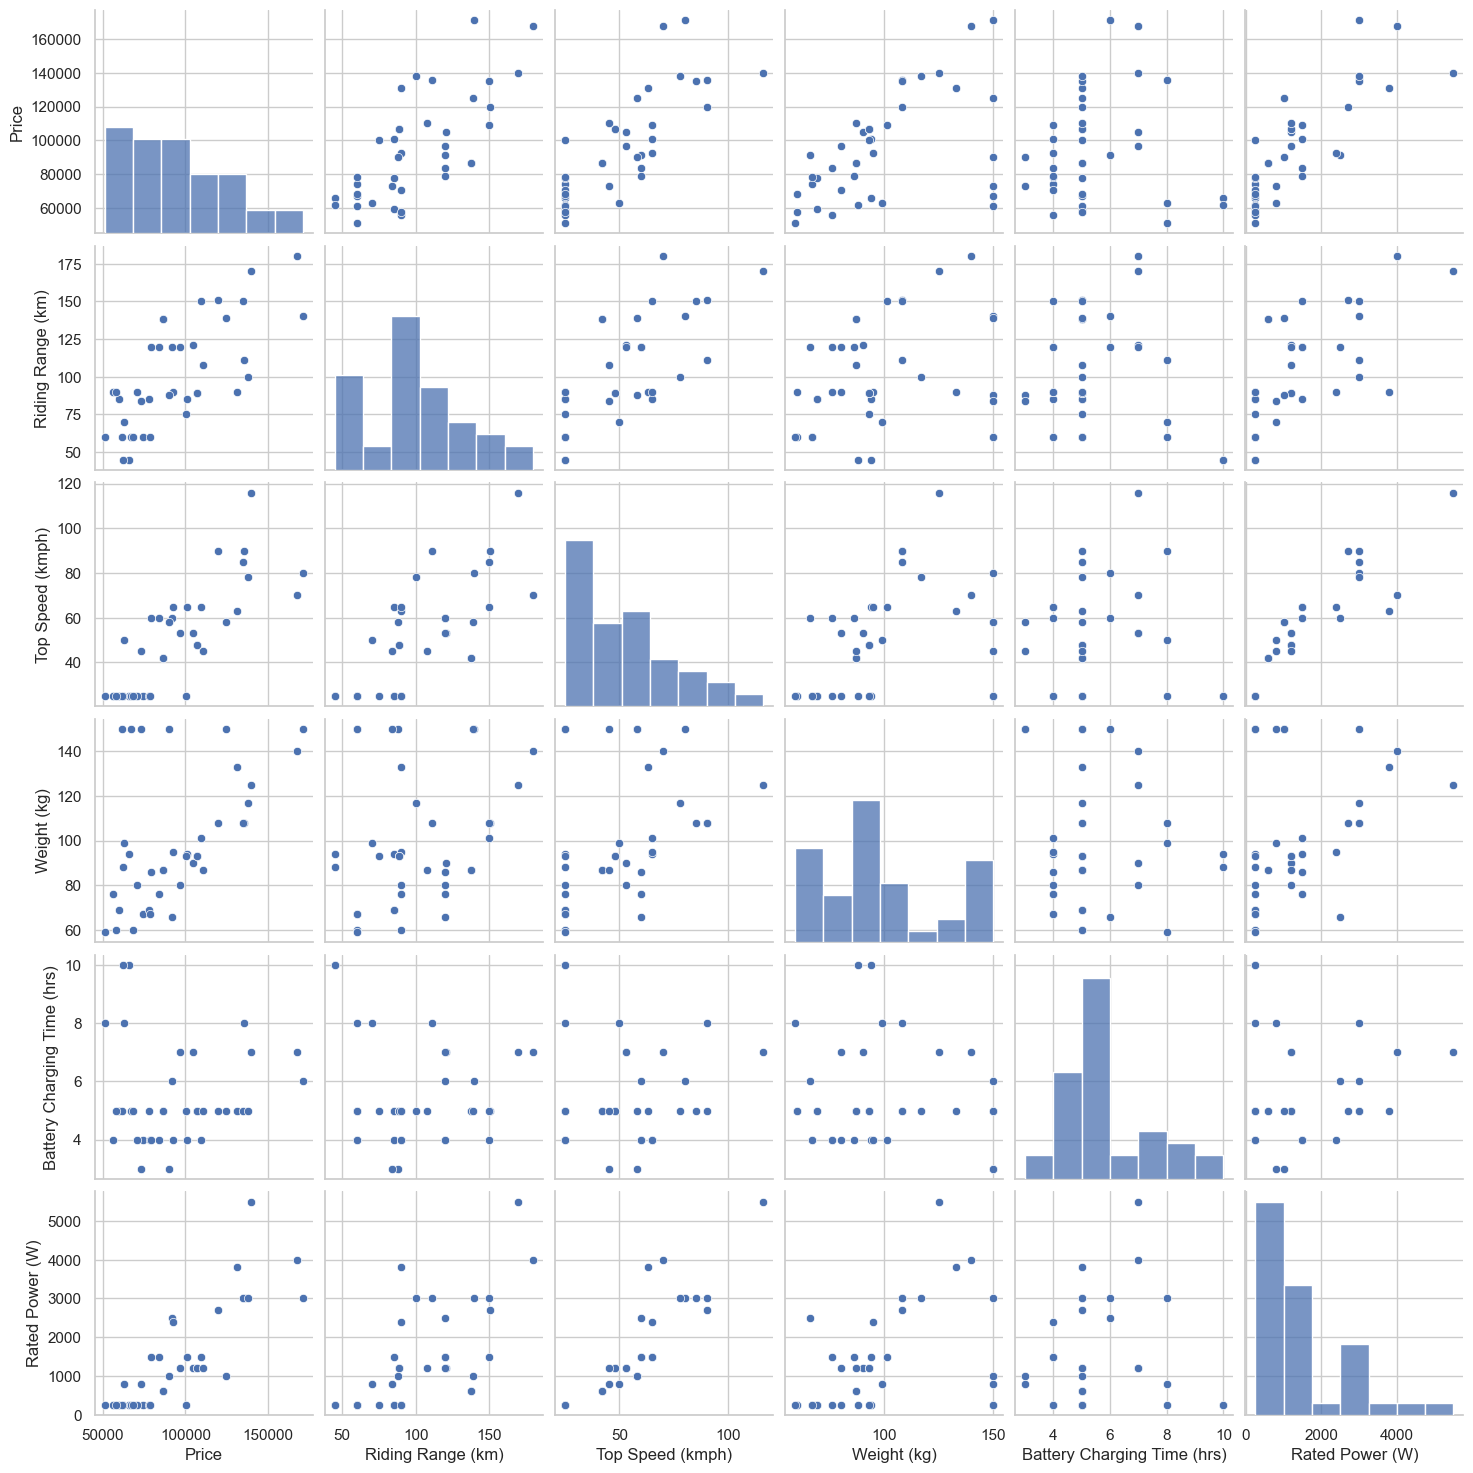

In [20]:
sns.pairplot(data_ev_specification.drop(columns=['Model Name']))

plt.show()

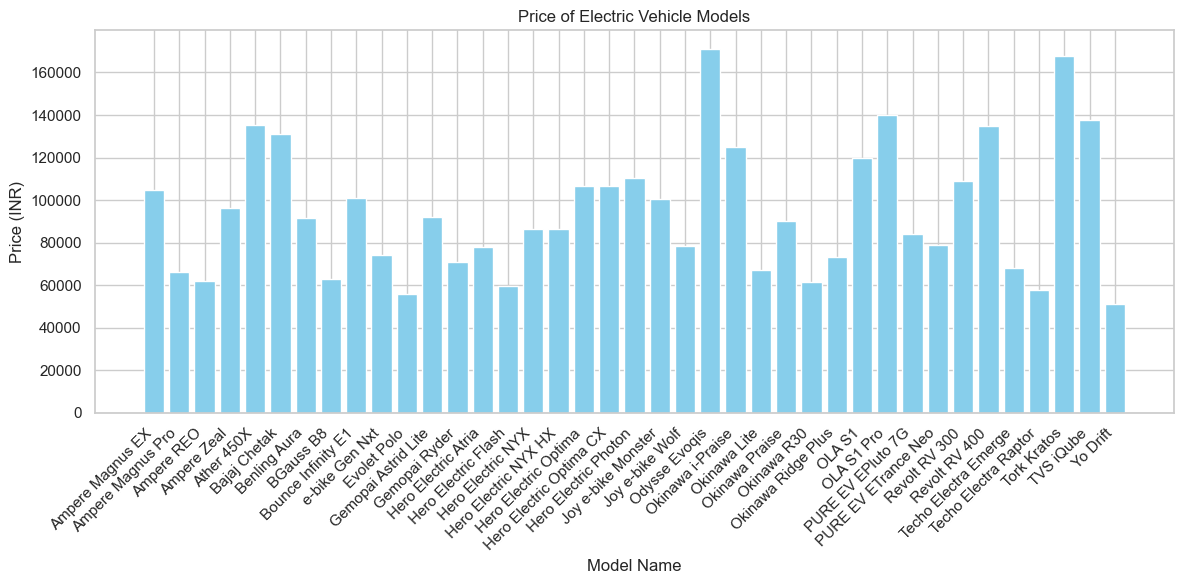

In [21]:
data_ev_specification = pd.read_csv("/Users/kanishka.arora/Downloads/ev_model_spec.csv")

plt.figure(figsize=(12, 6))
plt.bar(data_ev_specification['Model Name'], data_ev_specification['Price'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model Name')
plt.ylabel('Price (INR)')
plt.title('Price of Electric Vehicle Models')
plt.tight_layout()
plt.show()


In [22]:
data = data_review.merge(data_ev_specification, how = 'left', on = 'Model Name')

In [23]:
data.head(11)

Review   Usage Information  \
0   We all checked the bike's capacity to be 150 k...       Daily Commute   
1   Performance is very poor on this bike. The cha...          Everything   
2   I purchased this in April 2022 and the sales s...       Daily Commute   
3   If any issues come in scooty parts not availab...       Daily Commute   
4   Don't buy this vehicle unless you have a near ...       Daily Commute   
5   First 7k kms no issues.\nLater rear wheel had ...       Daily Commute   
6   The tvs iqube is supposed to be a game changer...  Occasional Commute   
7   I brought iqube in march 2021 used for about 1...       Daily Commute   
8   Buying experience - Chennai on road price is 1...       Daily Commute   
9   Hello,\nI purchased tvs iqube in march 2021, i...       Daily Commute   
10  I have used jupiter and activa both. But this ...       Daily Commute   

   Duration of Ownership      Ridden for  Rating  Visual Appeal  Reliability  \
0            Never owned             NaN       1            3.0          4.0   
1                 > 1 yr      < 5000 kms       1            3.0          1.0   
2             < 3 months      < 5000 kms       3            4.0          4.0   
3          6 months-1 yr  5000-10000 kms       1            1.0          1.0   
4          6 months-1 yr      < 5000 kms       1            3.0          4.0   
5                 > 1 yr  5000-10000 kms       1            5.0          1.0   
6          6 months-1 yr      < 5000 kms       3            3.0          2.0   
7             < 3 months      < 5000 kms       1            3.0          1.0   
8             < 3 months      < 5000 kms       3            3.0          3.0   
9             3-6 months      < 5000 kms       2            5.0          3.0   
10         6 months-1 yr      < 5000 kms       5            5.0          5.0   

    Performance  Service Experience  Extra Features  Comfort  \
0           NaN                 NaN             NaN      4.0   
1           NaN                 1.0             NaN      3.0   
2           NaN                 2.0             NaN      5.0   
3           NaN                 1.0             NaN      1.0   
4           NaN                 1.0             NaN      3.0   
5           NaN                 1.0             NaN      5.0   
6           NaN                 2.0             NaN      4.0   
7           NaN                 1.0             NaN      2.0   
8           NaN                 3.0             NaN      4.0   
9           NaN                 1.0             NaN      4.0   
10          NaN                 5.0             NaN      5.0   

    Maintenance cost  Value for Money Model Name   Price  Riding Range (km)  \
0                NaN              1.0  TVS iQube  137890                100   
1                NaN              3.0  TVS iQube  137890                100   
2                NaN              2.0  TVS iQube  137890                100   
3                NaN              1.0  TVS iQube  137890                100   
4                NaN              2.0  TVS iQube  137890                100   
5                NaN              2.0  TVS iQube  137890                100   
6                NaN              3.0  TVS iQube  137890                100   
7                NaN              1.0  TVS iQube  137890                100   
8                NaN              3.0  TVS iQube  137890                100   
9                NaN              3.0  TVS iQube  137890                100   
10               NaN              5.0  TVS iQube  137890                100   

    Top Speed (kmph)  Weight (kg)  Battery Charging Time (hrs)  \
0                 78          117                            5   
1                 78          117                            5   
2                 78          117                            5   
3                 78          117                            5   
4                 78          117                            5   
5                 78          117              

As we can see they have been concatenated

The below statment finds the percentage of missing values in each columns. Missing values have to be dealth with.

In [24]:
((data.isnull().sum() * 100/data.shape[0])).sort_values(ascending = False)

Maintenance cost               78.672986
Extra Features                 78.080569
Performance                    59.123223
Value for Money                53.791469
Comfort                        37.203791
Ridden for                     20.853081
Service Experience             16.706161
Reliability                    15.165877
Visual Appeal                  12.440758
Review                          5.568720
Usage Information               0.000000
Rating                          0.000000
Duration of Ownership           0.000000
Model Name                      0.000000
Price                           0.000000
Riding Range (km)               0.000000
Top Speed (kmph)                0.000000
Weight (kg)                     0.000000
Battery Charging Time (hrs)     0.000000
Rated Power (W)                 0.000000
dtype: float64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Review                       797 non-null    object 
 1   Usage Information            844 non-null    object 
 2   Duration of Ownership        844 non-null    object 
 3   Ridden for                   668 non-null    object 
 4   Rating                       844 non-null    int64  
 5   Visual Appeal                739 non-null    float64
 6   Reliability                  716 non-null    float64
 7   Performance                  345 non-null    float64
 8   Service Experience           703 non-null    float64
 9   Extra Features               185 non-null    float64
 10  Comfort                      530 non-null    float64
 11  Maintenance cost             180 non-null    float64
 12  Value for Money              390 non-null    float64
 13  Model Name          

The below set of code, will analyze the customer reviews and generate if either the review was postive, negative or neutral.

In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiments = SentimentIntensityAnalyzer()

def get_sentiment_label(review_text):

    if pd.isna(review_text):
        return 'neutral'
    
    sentiment_scores = sentiments.polarity_scores(review_text)
    pos_score = sentiment_scores['pos']
    neg_score = sentiment_scores['neg']
    
    if pos_score > neg_score:
        return 'positive'
    elif pos_score < neg_score:
        return 'negative'
    else:
        return 'neutral'

We add the sentiment column to the data .csv file

In [27]:
data['Sentiment'] = data['Review'].apply(get_sentiment_label)

In [28]:
data['Sentiment'].value_counts()

Sentiment
positive    531
negative    260
neutral      53
Name: count, dtype: int64

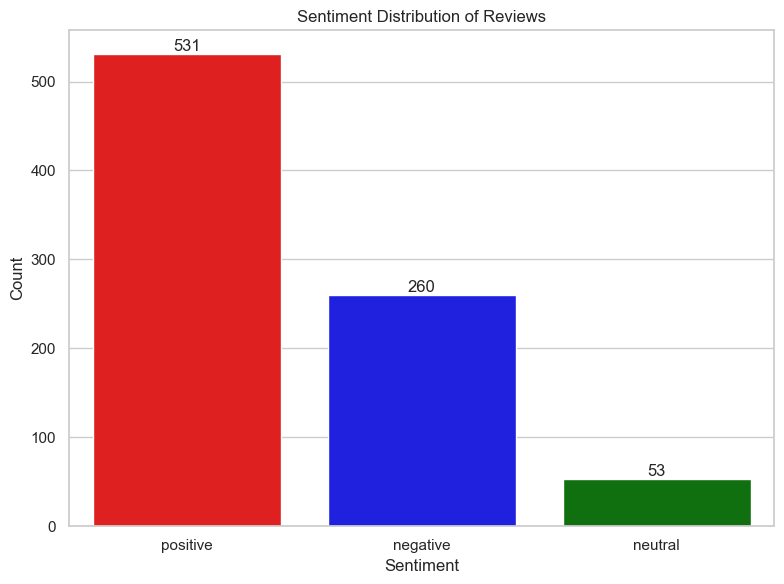

In [29]:
sentiment_counts = data['Sentiment'].value_counts()
bright_palette = ['red', 'blue', 'green']  # Bright colors for each sentiment

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=bright_palette)
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=12)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Reviews')
plt.tight_layout()
plt.show()

In [30]:
data.columns

Index(['Review', 'Usage Information', 'Duration of Ownership', 'Ridden for',
       'Rating', 'Visual Appeal', 'Reliability', 'Performance',
       'Service Experience', 'Extra Features', 'Comfort', 'Maintenance cost',
       'Value for Money', 'Model Name', 'Price', 'Riding Range (km)',
       'Top Speed (kmph)', 'Weight (kg)', 'Battery Charging Time (hrs)',
       'Rated Power (W)', 'Sentiment'],
      dtype='object')

In [31]:
data.head()

Review Usage Information  \
0  We all checked the bike's capacity to be 150 k...     Daily Commute   
1  Performance is very poor on this bike. The cha...        Everything   
2  I purchased this in April 2022 and the sales s...     Daily Commute   
3  If any issues come in scooty parts not availab...     Daily Commute   
4  Don't buy this vehicle unless you have a near ...     Daily Commute   

  Duration of Ownership      Ridden for  Rating  Visual Appeal  Reliability  \
0           Never owned             NaN       1            3.0          4.0   
1                > 1 yr      < 5000 kms       1            3.0          1.0   
2            < 3 months      < 5000 kms       3            4.0          4.0   
3         6 months-1 yr  5000-10000 kms       1            1.0          1.0   
4         6 months-1 yr      < 5000 kms       1            3.0          4.0   

   Performance  Service Experience  Extra Features  Comfort  Maintenance cost  \
0          NaN                 NaN             NaN      4.0               NaN   
1          NaN                 1.0             NaN      3.0               NaN   
2          NaN                 2.0             NaN      5.0               NaN   
3          NaN                 1.0             NaN      1.0               NaN   
4          NaN                 1.0             NaN      3.0               NaN   

   Value for Money Model Name   Price  Riding Range (km)  Top Speed (kmph)  \
0              1.0  TVS iQube  137890                100                78   
1              3.0  TVS iQube  137890                100                78   
2              2.0  TVS iQube  137890                100                78   
3              1.0  TVS iQube  137890                100                78   
4              2.0  TVS iQube  137890                100                78   

   Weight (kg)  Battery Charging Time (hrs)  Rated Power (W) Sentiment  
0          117                            5             3000  negative  
1          117                            5             3000  negative  
2          117                            5             3000  positive  
3          117                            5             3000  negative  
4          117                            5             3000  negative

Copying columns into a new data frame.

In [32]:
data_segment = data.iloc[:, 5:13].copy()

In [33]:
data_segment.head()

Visual Appeal  Reliability  Performance  Service Experience  \
0            3.0          4.0          NaN                 NaN   
1            3.0          1.0          NaN                 1.0   
2            4.0          4.0          NaN                 2.0   
3            1.0          1.0          NaN                 1.0   
4            3.0          4.0          NaN                 1.0   

   Extra Features  Comfort  Maintenance cost  Value for Money  
0             NaN      4.0               NaN              1.0  
1             NaN      3.0               NaN              3.0  
2             NaN      5.0               NaN              2.0  
3             NaN      1.0               NaN              1.0  
4             NaN      3.0               NaN              2.0

In [34]:
data_segment = data_segment.fillna(0.)

In [35]:
data_segment.head()

Visual Appeal  Reliability  Performance  Service Experience  \
0            3.0          4.0          0.0                 0.0   
1            3.0          1.0          0.0                 1.0   
2            4.0          4.0          0.0                 2.0   
3            1.0          1.0          0.0                 1.0   
4            3.0          4.0          0.0                 1.0   

   Extra Features  Comfort  Maintenance cost  Value for Money  
0             0.0      4.0               0.0              1.0  
1             0.0      3.0               0.0              3.0  
2             0.0      5.0               0.0              2.0  
3             0.0      1.0               0.0              1.0  
4             0.0      3.0               0.0              2.0

In [36]:
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visual Appeal       844 non-null    float64
 1   Reliability         844 non-null    float64
 2   Performance         844 non-null    float64
 3   Service Experience  844 non-null    float64
 4   Extra Features      844 non-null    float64
 5   Comfort             844 non-null    float64
 6   Maintenance cost    844 non-null    float64
 7   Value for Money     844 non-null    float64
dtypes: float64(8)
memory usage: 52.9 KB


In [37]:
data_segment.mean()

Visual Appeal         3.309242
Reliability           2.811611
Performance           1.441943
Service Experience    2.619668
Extra Features        0.643365
Comfort               2.300948
Maintenance cost      0.723934
Value for Money       1.562796
dtype: float64

The code standardizes the features in `data_segment` using `StandardScaler`, transforming the data to have a mean of 0 and a standard deviation of 1, and stores the result in `data_scaled`. It then initializes a `PCA` model with a fixed random state for reproducibility. Finally, the PCA model is fitted to the scaled data, computing the principal components to reduce the dataset's dimensionality while retaining most of its variance.

In [38]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_segment)
pca = PCA(random_state = 42)
pca.fit(data_scaled)

PCA(random_state=42)

In [39]:
data_pca = pca.fit_transform(data_scaled)
columns_pca = [f'PC{i}' for i in range(1, data_pca.shape[1] + 1)]
df_pca = pd.DataFrame(data_pca, columns=columns_pca)


In [40]:
df_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -0.291227 -1.038055  0.354864  0.623469  1.102720  0.169287  0.438012   
1   -0.710801 -1.394405 -0.360466  0.621671 -0.320899  0.086053  0.426279   
2    0.849149 -1.189765  0.167683  0.410898  0.409054  0.191904  0.329993   
3   -1.967022 -0.878935 -0.100197 -0.330003  0.075822 -0.069599 -0.013068   
4   -0.078940 -1.017161 -0.079210  0.324132  0.961554 -0.005517  0.107260   
..        ...       ...       ...       ...       ...       ...       ...   
839 -0.663022 -1.195402 -0.546012 -0.224861  0.088834 -0.056367  0.112644   
840  1.224044  4.834473 -0.996547 -0.174362 -0.094547 -0.083036  0.136808   
841 -1.228218  1.979815  0.215033 -0.312138 -0.034120 -0.947901  0.658191   
842  0.606741 -1.684147 -0.752185  1.253207  1.058156  0.090213  0.755116   
843  1.203860 -1.360364 -0.616274 -0.589796  0.183076  0.044319  0.179131   

          PC8  
0   -0.957827  
1    0.149917  
2   -0.830738  
3   -0.011328  
4   -0.427972  
..        ...  
839  0.316764  
840 -0.075206  
841  0.421434  
842  0.254716  
843  0.073055  

[844 rows x 8 columns]

In [41]:
df_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.291227 -1.038055  0.354864  0.623469  1.102720  0.169287  0.438012   
1 -0.710801 -1.394405 -0.360466  0.621671 -0.320899  0.086053  0.426279   
2  0.849149 -1.189765  0.167683  0.410898  0.409054  0.191904  0.329993   
3 -1.967022 -0.878935 -0.100197 -0.330003  0.075822 -0.069599 -0.013068   
4 -0.078940 -1.017161 -0.079210  0.324132  0.961554 -0.005517  0.107260   

        PC8  
0 -0.957827  
1  0.149917  
2 -0.830738  
3 -0.011328  
4 -0.427972

In [42]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})
pca_summary

Standard Deviation  Proportion of Variance  Cumultive Proportion
PC1            1.845017                0.425007              0.425007
PC2            1.736646                0.376546              0.801553
PC3            0.903486                0.101915              0.903468
PC4            0.517750                0.033468              0.936936
PC5            0.405239                0.020503              0.957439
PC6            0.379558                0.017987              0.975426
PC7            0.337883                0.014254              0.989680
PC8            0.287510                0.010320              1.000000

In [43]:
factor_loadings = pd.DataFrame(pca.components_, columns = data_segment.columns, index = df_pca.columns).T

In [44]:
styled_loadings = factor_loadings.style.background_gradient(cmap='viridis')
display(styled_loadings)

Plotting the PCA (PC1 versus PC2)

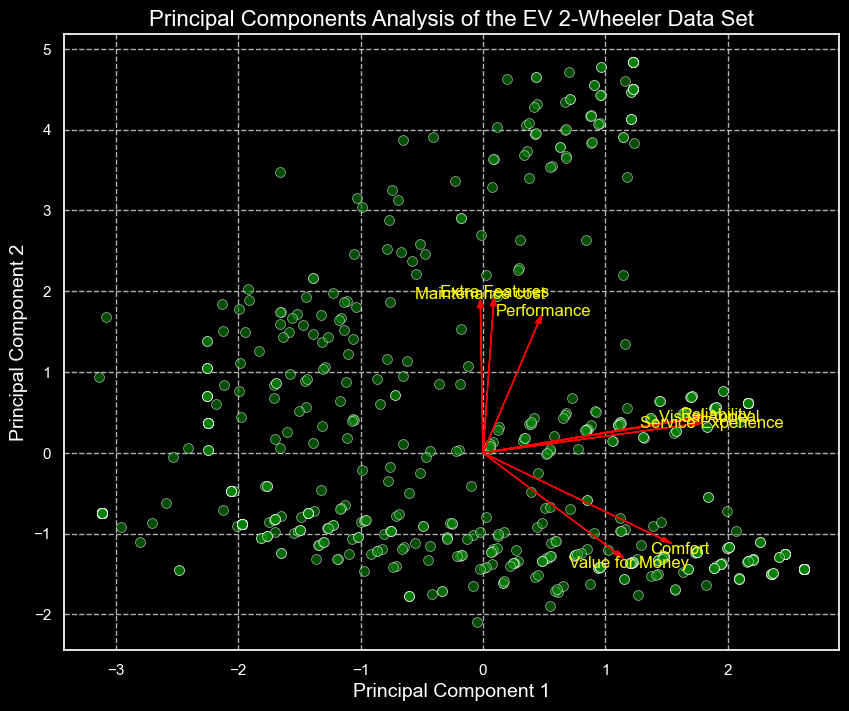

In [45]:
index_names = factor_loadings.index

plt.style.use('dark_background')
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', color='green', s=50, alpha=0.6)

for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, 
              factor_loadings['PC1'][i] * 3.5, 
              factor_loadings['PC2'][i] * 3.5, 
              head_width=0.05, 
              head_length=0.1, 
              fc='red', 
              ec='red')
    
    # Adjust text position to avoid overlap
    text_x = factor_loadings['PC1'][i] * 3.5 * 1.1
    text_y = factor_loadings['PC2'][i] * 3.5 * 1.1
    
    plt.text(text_x, 
             text_y, 
             index_names[i], 
             fontsize=12, 
             ha='center', 
             color='yellow', 
             va='center_baseline')

# Set labels and title
plt.xlabel('Principal Component 1', fontsize=14, color='white')
plt.ylabel('Principal Component 2', fontsize=14, color='white')
plt.title('Principal Components Analysis of the EV 2-Wheeler Data Set', fontsize=16, color='white')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("pca_2w.png", format='png', dpi=300, bbox_inches='tight', facecolor='black')
plt.show()


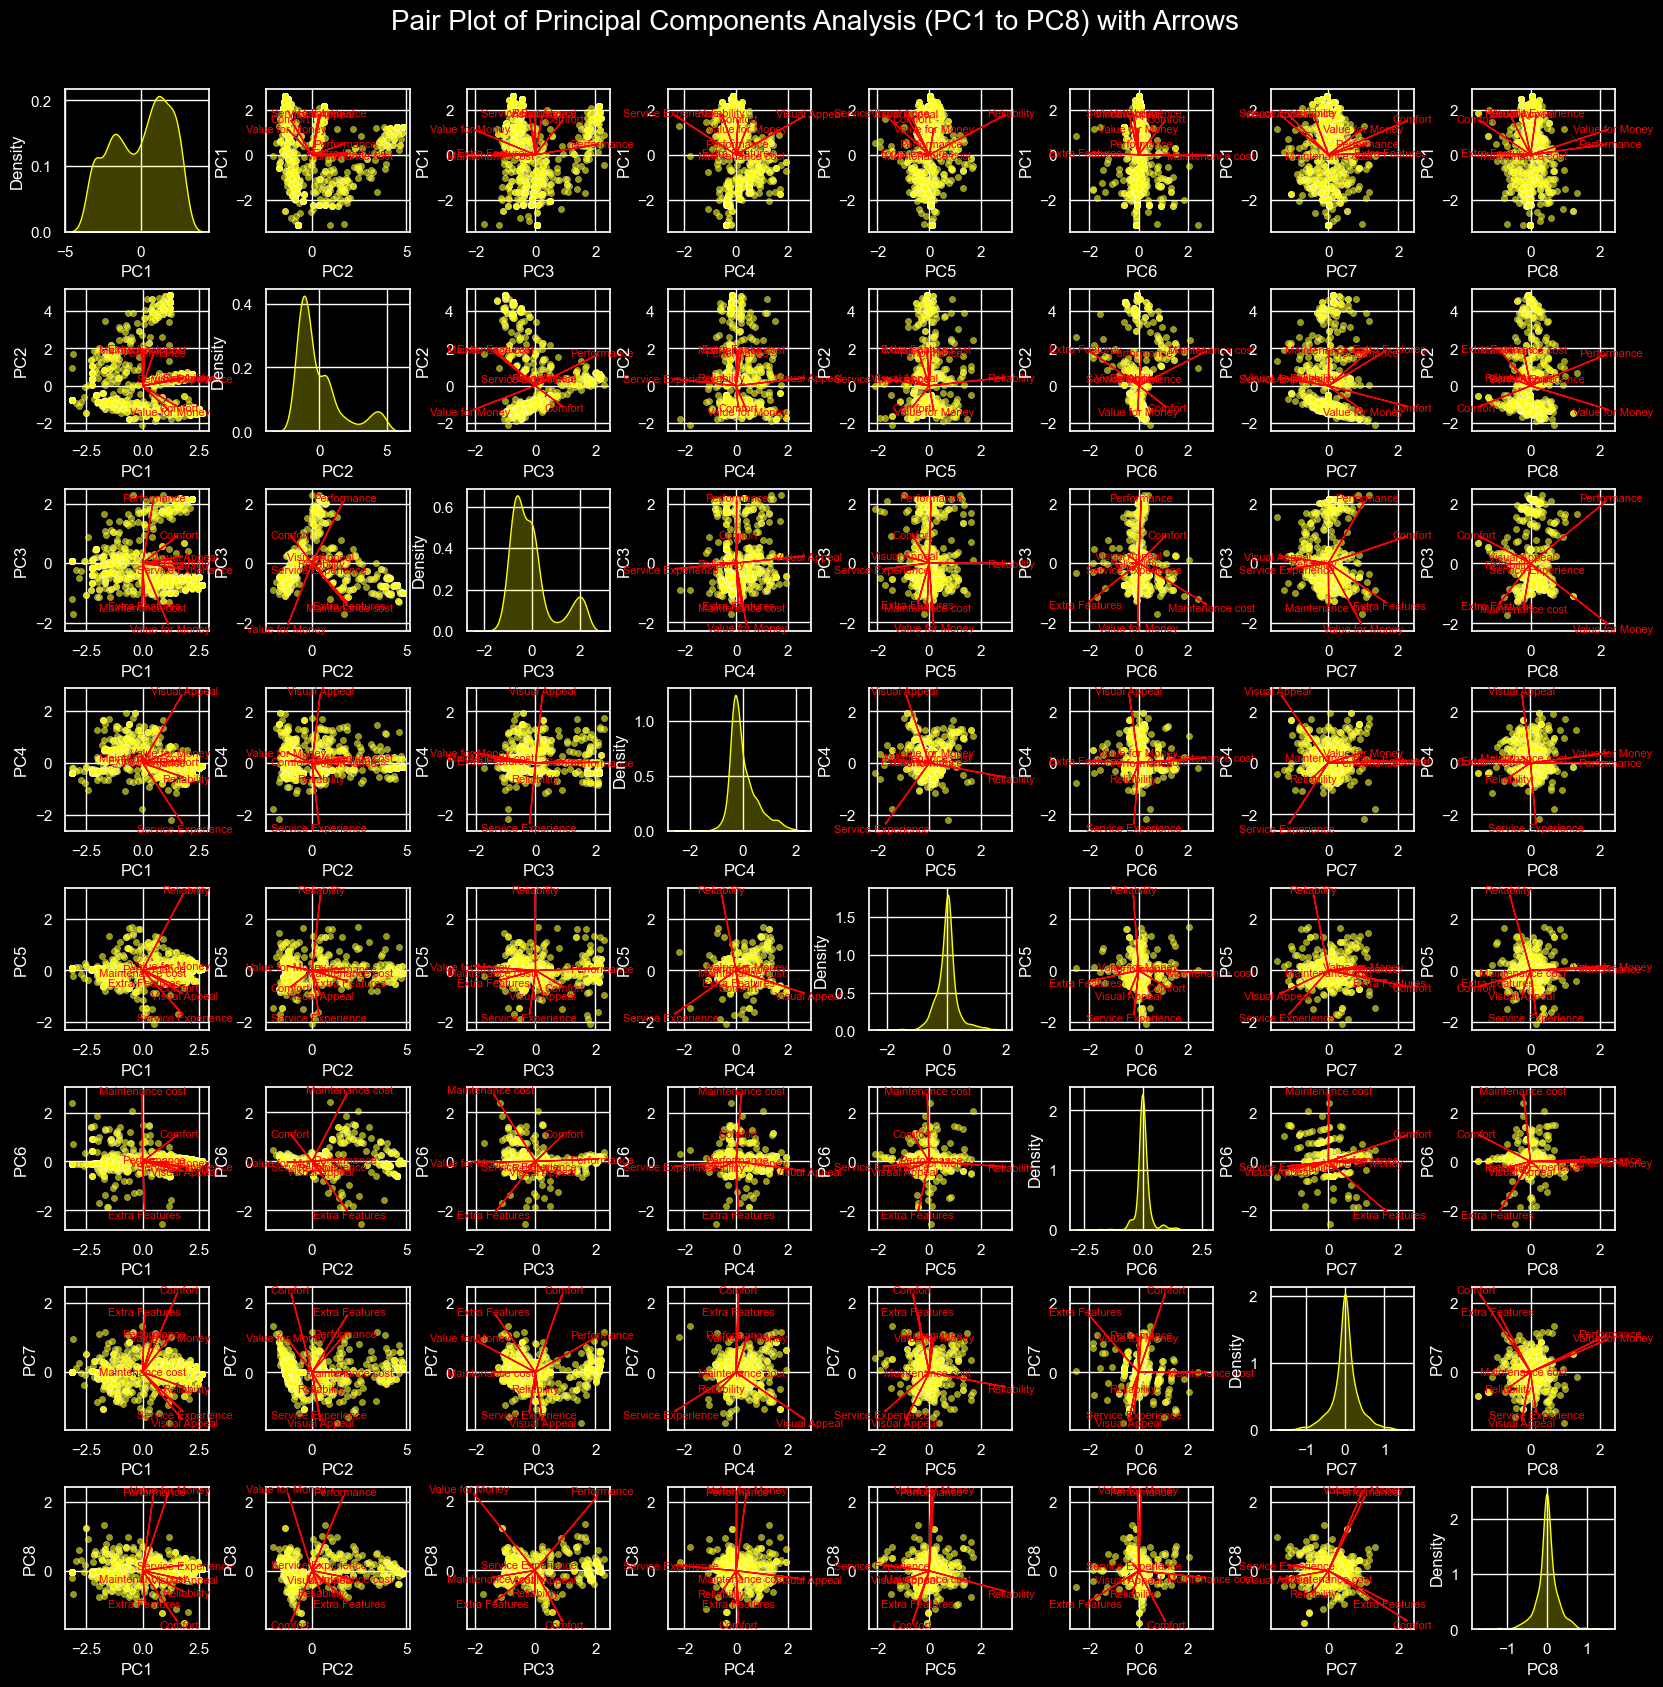

In [46]:
plt.style.use('dark_background')
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i in range(8):
    for j in range(8):
        if i == j:
            sns.kdeplot(df_pca.iloc[:, i], ax=axes[i, j], color='yellow', fill=True)
        else:
            sns.scatterplot(data=df_pca, x=df_pca.columns[j], y=df_pca.columns[i], color='yellow', s=20, alpha=0.6, ax=axes[i, j])
            
            for k in range(len(factor_loadings['PC1'])):
                axes[i, j].arrow(0, 0, 
                                 factor_loadings.iloc[k, j] * 3.5, 
                                 factor_loadings.iloc[k, i] * 3.5, 
                                 head_width=0.05, 
                                 head_length=0.1, 
                                 fc='red', 
                                 ec='red')
                text_x = factor_loadings.iloc[k, j] * 3.5 * 1.1
                text_y = factor_loadings.iloc[k, i] * 3.5 * 1.1
                axes[i, j].text(text_x, 
                                text_y, 
                                factor_loadings.index[k], 
                                fontsize=8, 
                                ha='center', 
                                color='red', 
                                va='center_baseline')

        axes[i, j].tick_params(color='white', labelcolor='white')
        axes[i, j].xaxis.label.set_color('white')
        axes[i, j].yaxis.label.set_color('white')
        axes[i, j].spines['bottom'].set_color('white')
        axes[i, j].spines['top'].set_color('white') 
        axes[i, j].spines['right'].set_color('white')
        axes[i, j].spines['left'].set_color('white')

fig.suptitle('Pair Plot of Principal Components Analysis (PC1 to PC8) with Arrows', fontsize=20, color='white', y=0.92)
plt.show()

The above plot was just for generational pourposes, but gives all combinations.

In [47]:
kmeans_models = [KMeans(n_clusters=k, random_state=42).fit(data_scaled) for k in range(2, 9)]
wcss_values = [model.inertia_ for model in kmeans_models]

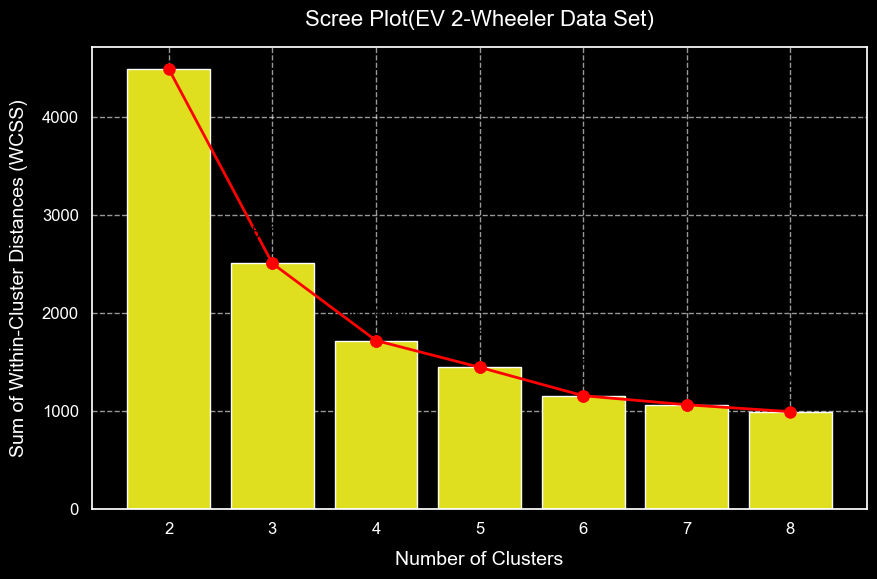

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(2, 9)), y=wcss_values, color='yellow')
for i in range(len(wcss_values) - 1):
    plt.plot([i, i + 1], [wcss_values[i], wcss_values[i + 1]], marker='o', color='red', linestyle='-', linewidth=2, markersize=8)

plt.xlabel("Number of Clusters", fontsize=14, labelpad=10)
plt.ylabel("Sum of Within-Cluster Distances (WCSS)", fontsize=14, labelpad=10)
plt.title("Scree Plot(EV 2-Wheeler Data Set)", fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

for i, wcss in enumerate(wcss_values):
    plt.text(i, wcss + 0.05 * max(wcss_values), f'{wcss:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()

The elbow can be oberved from 4, and hence that should be the optimal number of segments for our analysis.

In [49]:
selected_kmeans_model = kmeans_models[2]
clustered_data_scaled = pd.DataFrame(data_scaled, columns=data_segment.columns)
clustered_data_scaled['cluster'] = selected_kmeans_model.labels_
clustered_data_pca = df_pca.copy()
clustered_data_pca['cluster'] = selected_kmeans_model.labels_

# Profiling Segments

It then adds a new column 'cluster' to data_profile, assigning cluster labels based on the predictions made by the selected KMeans model (selected_kmeans_model.labels_). This allows each row in data_profile to be associated with a cluster label, facilitating further analysis or profiling of data segments based on these clusters.

In [50]:
data_profile = data_segment.copy()
data_profile['cluster'] = selected_kmeans_model.labels_

In [51]:
columns_segment = clustered_data_scaled.columns
data_pivot = data_profile[columns_segment].groupby('cluster').mean().T
data_pivot_mean = data_pivot.mean(axis = 1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

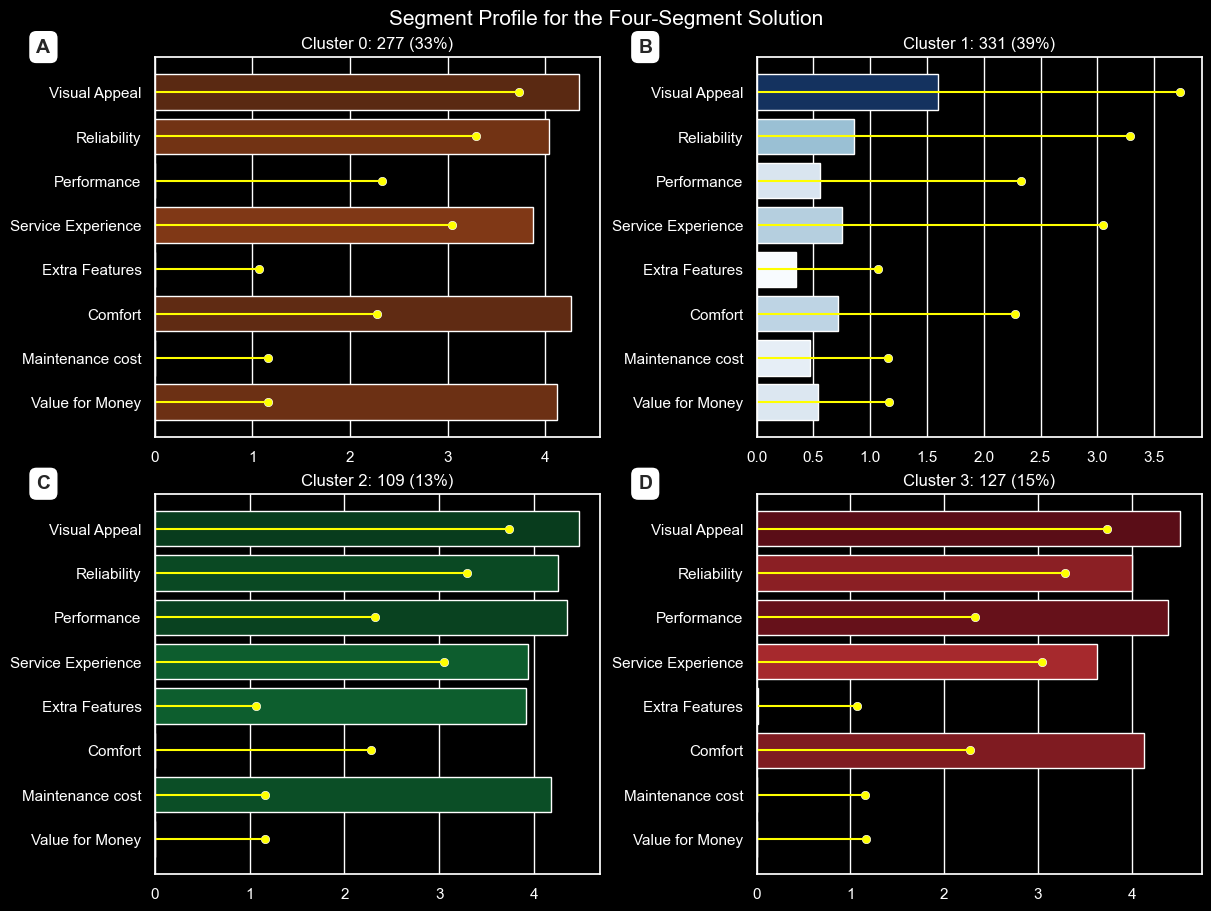

In [52]:
sns.set_style("darkgrid")
sns.set_palette("bright")

fig, axs = plt.subplots(2, 2, figsize=(12, 9), constrained_layout=True, facecolor='black')
color_maps = ['YlOrBr', 'Blues', 'Greens', 'Reds']

for i, (ax, cmap_name) in enumerate(zip(axs.flatten(), color_maps)):
    values = data_pivot[i]
    norm = plt.Normalize(values.min(), values.max())
    cmap = plt.get_cmap(cmap_name)
    bars = sns.barplot(data=data_pivot, x=i, y=data_pivot.index, ax=ax, palette=cmap(norm(values)))
    sns.scatterplot(data=data_pivot_mean, x='Value', y='Variable', color='yellow', ax=ax)
    for _, row in data_pivot_mean.iterrows():
        ax.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='yellow', alpha=1)
    ax.set_facecolor('black')  
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title(f"Cluster {i}: {data_profile['cluster'].value_counts()[i]} ({data_profile['cluster'].value_counts()[i]*100/len(data_profile):.0f}%)", color='white')
    ax.tick_params(axis='x', colors='white')  
    ax.tick_params(axis='y', colors='white')  

labels = ['A', 'B', 'C', 'D']
for ax, label in zip(axs.flatten(), labels):
    ax.text(-0.25, 1.05, label, transform=ax.transAxes, fontsize=14, fontweight='bold', va='top', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))
fig.suptitle("Segment Profile for the Four-Segment Solution", fontsize=15, color='white')
fig.patch.set_facecolor('black')  
plt.show()


The graph in the above figure provides a comprehensive analysis of our consumer segments, highlighting the varied perceptions across different clusters.

### Cluster 0 (33% of consumers)
This segment highly values the electric two-wheeler for its visual appeal, reliability, service experience, comfort, and value for money. Their positive perception across multiple dimensions indicates a generally satisfied group.

### Cluster 1 (39% of consumers)
Representing the largest segment, these consumers express dissatisfaction across all evaluated aspects, particularly in visual appeal and comfort. This cluster stands out as the least satisfied, suggesting areas for significant improvement to meet their expectations.

### Cluster 2 (13% of consumers)
Although the smallest group, this segment appreciates the vehicle's visual appeal, reliability, performance, service experience, and notably its extra features and maintenance cost. Their distinct focus on additional features and cost-effective maintenance highlights specific areas of value for them.

### Cluster 3 (15% of consumers)
This segment values visual appeal, reliability, service experience, comfort, and perceives strong value for money. Their positive outlook across these aspects suggests a generally content and value-conscious group.

Overall, the graph underscores the diverse consumer perceptions, with each segment highlighting different priorities and satisfaction levels. Addressing the specific concerns of the least satisfied group (Cluster 1) and maintaining the strengths appreciated by the other segments can guide targeted improvements and strategic marketing efforts.

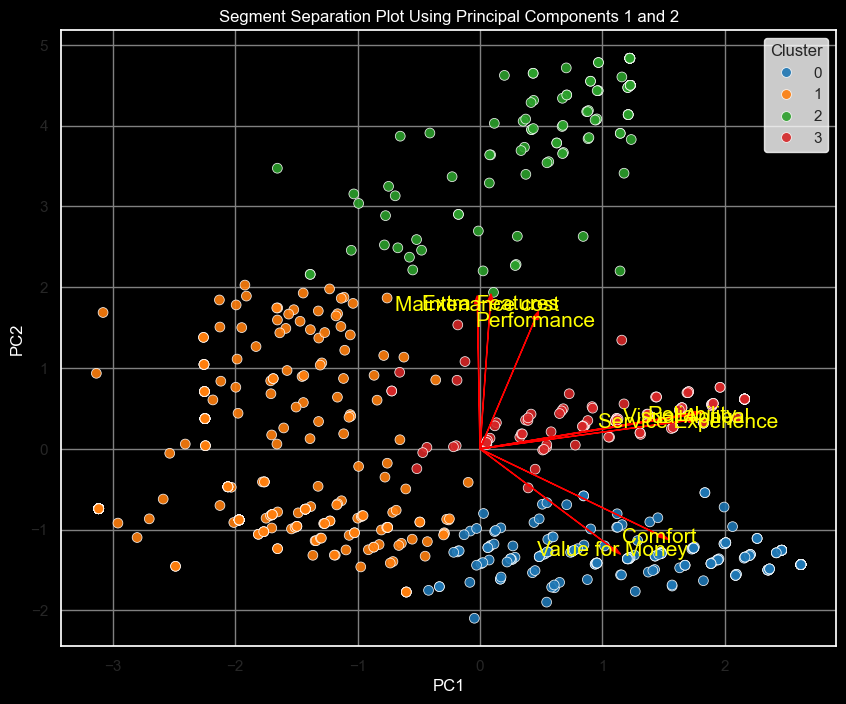

In [53]:
index_names = factor_loadings.index

plt.figure(figsize=(10, 8), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
sns.scatterplot(data=clustered_data_pca, x='PC1', y='PC2', hue='cluster', palette='tab10', s=50, edgecolor='w', alpha=0.9, ax=ax)

for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5,
              head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, index_names[i],
             fontsize=15, ha='center', color='yellow', va='center_baseline')

plt.xlabel('PC1', color='white')
plt.ylabel('PC2', color='white')
plt.title('Segment Separation Plot Using Principal Components 1 and 2', color='white')
plt.legend(title='Cluster', loc='upper right', facecolor='white', edgecolor='white')
plt.grid(True, color='gray')
plt.show()

The accompanying figure, utilizing principal components, further emphasizes these differences. Notably, Segment 1, despite being the largest segment, lacks specific opinions, making them unique in their lack of satisfaction. These detailed insights play a pivotal role in shaping our strategy, ensuring our electric vehicles align precisely with the diverse values and priorities of each segment, thus informing our market offerings accurately.



# Describing Segments

In this section we perform data analysis on describing the segemnets.

In [54]:
data_describing_segments = data.copy()
data_describing_segments['cluster'] = selected_kmeans_model.labels_

In [55]:
data_describing_segments.head(11)

Review   Usage Information  \
0   We all checked the bike's capacity to be 150 k...       Daily Commute   
1   Performance is very poor on this bike. The cha...          Everything   
2   I purchased this in April 2022 and the sales s...       Daily Commute   
3   If any issues come in scooty parts not availab...       Daily Commute   
4   Don't buy this vehicle unless you have a near ...       Daily Commute   
5   First 7k kms no issues.\nLater rear wheel had ...       Daily Commute   
6   The tvs iqube is supposed to be a game changer...  Occasional Commute   
7   I brought iqube in march 2021 used for about 1...       Daily Commute   
8   Buying experience - Chennai on road price is 1...       Daily Commute   
9   Hello,\nI purchased tvs iqube in march 2021, i...       Daily Commute   
10  I have used jupiter and activa both. But this ...       Daily Commute   

   Duration of Ownership      Ridden for  Rating  Visual Appeal  Reliability  \
0            Never owned             NaN       1            3.0          4.0   
1                 > 1 yr      < 5000 kms       1            3.0          1.0   
2             < 3 months      < 5000 kms       3            4.0          4.0   
3          6 months-1 yr  5000-10000 kms       1            1.0          1.0   
4          6 months-1 yr      < 5000 kms       1            3.0          4.0   
5                 > 1 yr  5000-10000 kms       1            5.0          1.0   
6          6 months-1 yr      < 5000 kms       3            3.0          2.0   
7             < 3 months      < 5000 kms       1            3.0          1.0   
8             < 3 months      < 5000 kms       3            3.0          3.0   
9             3-6 months      < 5000 kms       2            5.0          3.0   
10         6 months-1 yr      < 5000 kms       5            5.0          5.0   

    Performance  Service Experience  Extra Features  Comfort  \
0           NaN                 NaN             NaN      4.0   
1           NaN                 1.0             NaN      3.0   
2           NaN                 2.0             NaN      5.0   
3           NaN                 1.0             NaN      1.0   
4           NaN                 1.0             NaN      3.0   
5           NaN                 1.0             NaN      5.0   
6           NaN                 2.0             NaN      4.0   
7           NaN                 1.0             NaN      2.0   
8           NaN                 3.0             NaN      4.0   
9           NaN                 1.0             NaN      4.0   
10          NaN                 5.0             NaN      5.0   

    Maintenance cost  Value for Money Model Name   Price  Riding Range (km)  \
0                NaN              1.0  TVS iQube  137890                100   
1                NaN              3.0  TVS iQube  137890                100   
2                NaN              2.0  TVS iQube  137890                100   
3                NaN              1.0  TVS iQube  137890                100   
4                NaN              2.0  TVS iQube  137890                100   
5                NaN              2.0  TVS iQube  137890                100   
6                NaN              3.0  TVS iQube  137890                100   
7                NaN              1.0  TVS iQube  137890                100   
8                NaN              3.0  TVS iQube  137890                100   
9                NaN              3.0  TVS iQube  137890                100   
10               NaN              5.0  TVS iQube  137890                100   

    Top Speed (kmph)  Weight (kg)  Battery Charging Time (hrs)  \
0                 78          117                            5   
1                 78          117                            5   
2                 78          117                            5   
3                 78          117                            5   
4                 78          117                            5   
5                 78          117              

In [56]:
data_describing_segments.columns

Index(['Review', 'Usage Information', 'Duration of Ownership', 'Ridden for',
       'Rating', 'Visual Appeal', 'Reliability', 'Performance',
       'Service Experience', 'Extra Features', 'Comfort', 'Maintenance cost',
       'Value for Money', 'Model Name', 'Price', 'Riding Range (km)',
       'Top Speed (kmph)', 'Weight (kg)', 'Battery Charging Time (hrs)',
       'Rated Power (W)', 'Sentiment', 'cluster'],
      dtype='object')

- ### Mosaic Plot
Mosaic plots visualise tables containing more than two descriptor variables and integrate elements of inferential statistics. The below function describes the Mosaic plot and can be called later on as well.

In [57]:
def mosaicplot(df, color_list, figsize=(10, 7), barwidth=1, title="Simple Mosaic Plot", xlabel='Segments', ylabel='Proportion', title_color='black', xlabel_color='black', ylabel_color='black', legend_title='Categories', legend_loc='upper left', legend_bbox_to_anchor=(1, 1), legend_ncol=1, show_grid=False):    
    fig, ax = plt.subplots(figsize=figsize)
    p_cnt_ratio_df = df.div(df.sum(1), axis=0)
    ratio_cum_df = p_cnt_ratio_df.cumsum(axis=1)
    col_order = ratio_cum_df.columns.tolist()
    
    x = [str(n) for n in ratio_cum_df.index.tolist()]

    for col, colour in zip(col_order[::-1], color_list):
        plt.bar(x, ratio_cum_df[col], color=colour, edgecolor='white', width=barwidth, label=col)

    plt.legend(title=legend_title, loc=legend_loc, bbox_to_anchor=legend_bbox_to_anchor, ncol=legend_ncol, frameon=False)
    plt.title(title, color=title_color)
    plt.xlabel(xlabel, color=xlabel_color)
    plt.ylabel(ylabel, color=ylabel_color)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.yticks([])
    if show_grid:
        plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()

In [58]:
Usage_Information_cluster = pd.crosstab(index = data_describing_segments['cluster'], columns = data_describing_segments['Usage Information'])

In [59]:
Usage_Information_cluster

Usage Information  Daily Commute  Everything  Leisure Rides  \
cluster                                                       
0                            194          55              7   
1                            245          47              7   
2                             86          19              2   
3                             75          39              4   

Usage Information  Occasional Commute  Tours  
cluster                                       
0                                  19      2  
1                                  27      5  
2                                   1      1  
3                                   9      0

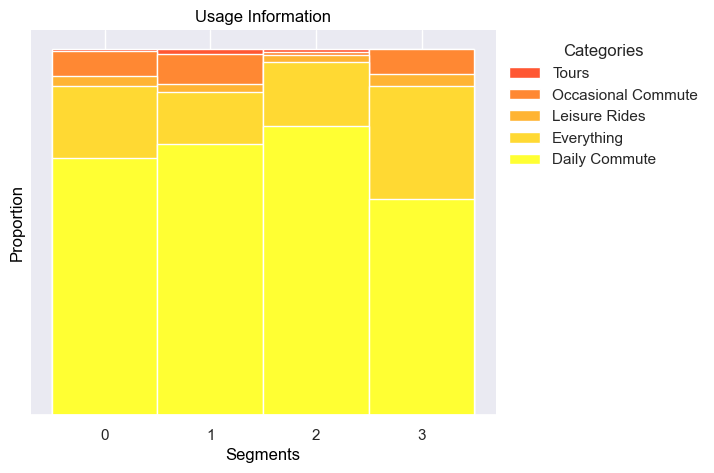

In [60]:
color_list = ['#FF5733', '#FF8833', '#FFB433', '#FFD933', '#FFFF33']

mosaicplot(Usage_Information_cluster, color_list[:5], figsize=(6,5), barwidth = 1, title = 'Usage Information' )

In [61]:
Duration_of_Ownership_cluster = pd.crosstab(index = data_describing_segments['cluster'], columns = data_describing_segments['Duration of Ownership'])

In [62]:
Duration_of_Ownership_cluster

Duration of Ownership  3-6 months  6 months-1 yr  < 3 months  > 1 yr  \
cluster                                                                
0                              41             51          79      56   
1                              40             56          67     117   
2                              14             13          43      20   
3                              16             14          31      10   

Duration of Ownership  Never owned  Occasional Commute  
cluster                                                 
0                               50                   0  
1                               50                   1  
2                               19                   0  
3                               56                   0

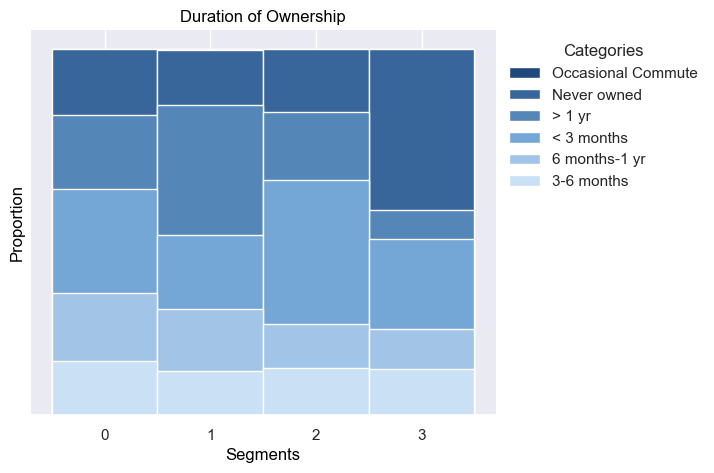

In [63]:
color_list = ['#1F497D', '#38669B', '#5586B8', '#74A6D6', '#A2C4E7', '#C9E0F5']

mosaicplot(Duration_of_Ownership_cluster, color_list[:6], figsize=(6,5), barwidth = 1, title = 'Duration of Ownership' )

The mosaic plot above illustrates the duration of electric vehicle ownership across different segments:

- Segment 0 has no prior ownership experience.
- Segment 1 stands out for owning electric vehicles for more than a year.
- Segment 2 members have moderate ownership durations, ranging from less than 3 months to over a year.
- Segment 3 consumers have owned electric vehicles for a short period, from a few days to less than 3 months.


In [64]:
Ridden_for_cluster = pd.crosstab(index = data_describing_segments['cluster'], columns = data_describing_segments['Ridden for'])

In [65]:
Ridden_for_cluster

Ridden for  10000-15000 kms  5000-10000 kms  < 5000 kms  > 15000 kms  \
cluster                                                                
0                        11              44         158           14   
1                        15              61         185           18   
2                         5              18          62            5   
3                         1              15          54            1   

Ridden for  Never owned  
cluster                  
0                     0  
1                     1  
2                     0  
3                     0

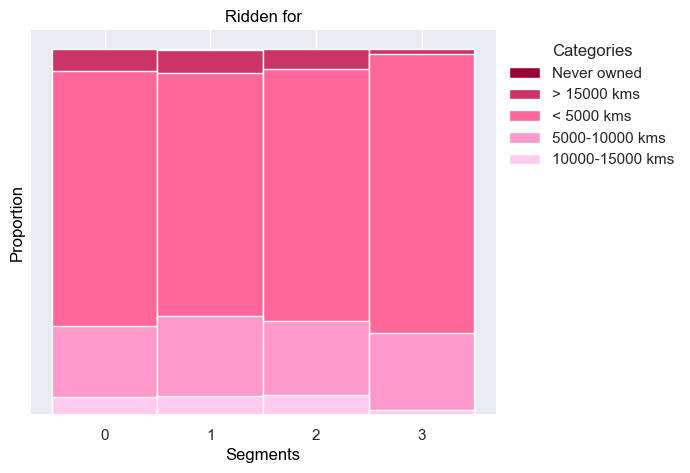

In [66]:
color_list = ['#990033', '#CC3366', '#FF6699', '#FF99CC', '#FFCCF0']

mosaicplot(Ridden_for_cluster, color_list[:5], figsize=(6,5), barwidth = 1, title = 'Ridden for' )

- The mosaic plot illustrates the distances covered by consumers.
- All segments predominantly use electric vehicles for commuting.
- Most users cover distances below 5000 kms.
- A small portion of users falls in the 5000 to 10000 kms range, aligning with their commuting needs.


In [67]:
Rating_cluster = pd.crosstab(index = data_describing_segments['cluster'], columns = data_describing_segments['Rating'])

In [68]:
Rating_cluster

Rating     1   2   3   4    5
cluster                      
0          7  14  29  70  157
1        222  24  19  29   37
2          3   8  10  21   67
3          7   2   7  31   80

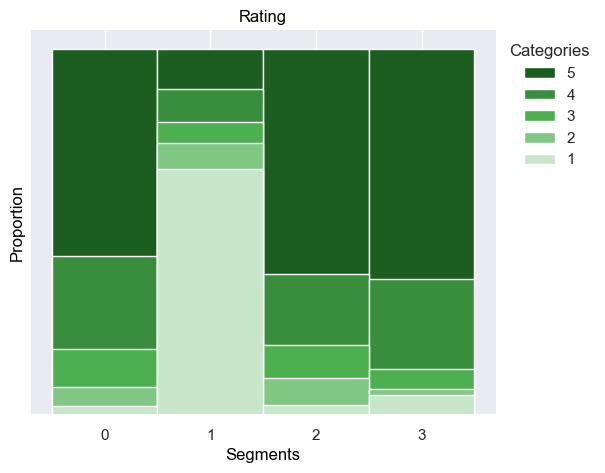

In [69]:
color_list = ['#1B5E20', '#388E3C', '#4CAF50', '#81C784', '#C8E6C9']

mosaicplot(Rating_cluster, color_list, figsize=(6,5), barwidth = 1, title = 'Rating' )

We can see the most users across segments have their rating 5 except fot the 1st segment where the rating is largely dominated by the rating 1

In [70]:
selected_columns = data_describing_segments.columns[-18:-9]  

print(selected_columns)

Index(['Rating', 'Visual Appeal', 'Reliability', 'Performance',
       'Service Experience', 'Extra Features', 'Comfort', 'Maintenance cost',
       'Value for Money'],
      dtype='object')


- ### Box and Whisker Plot

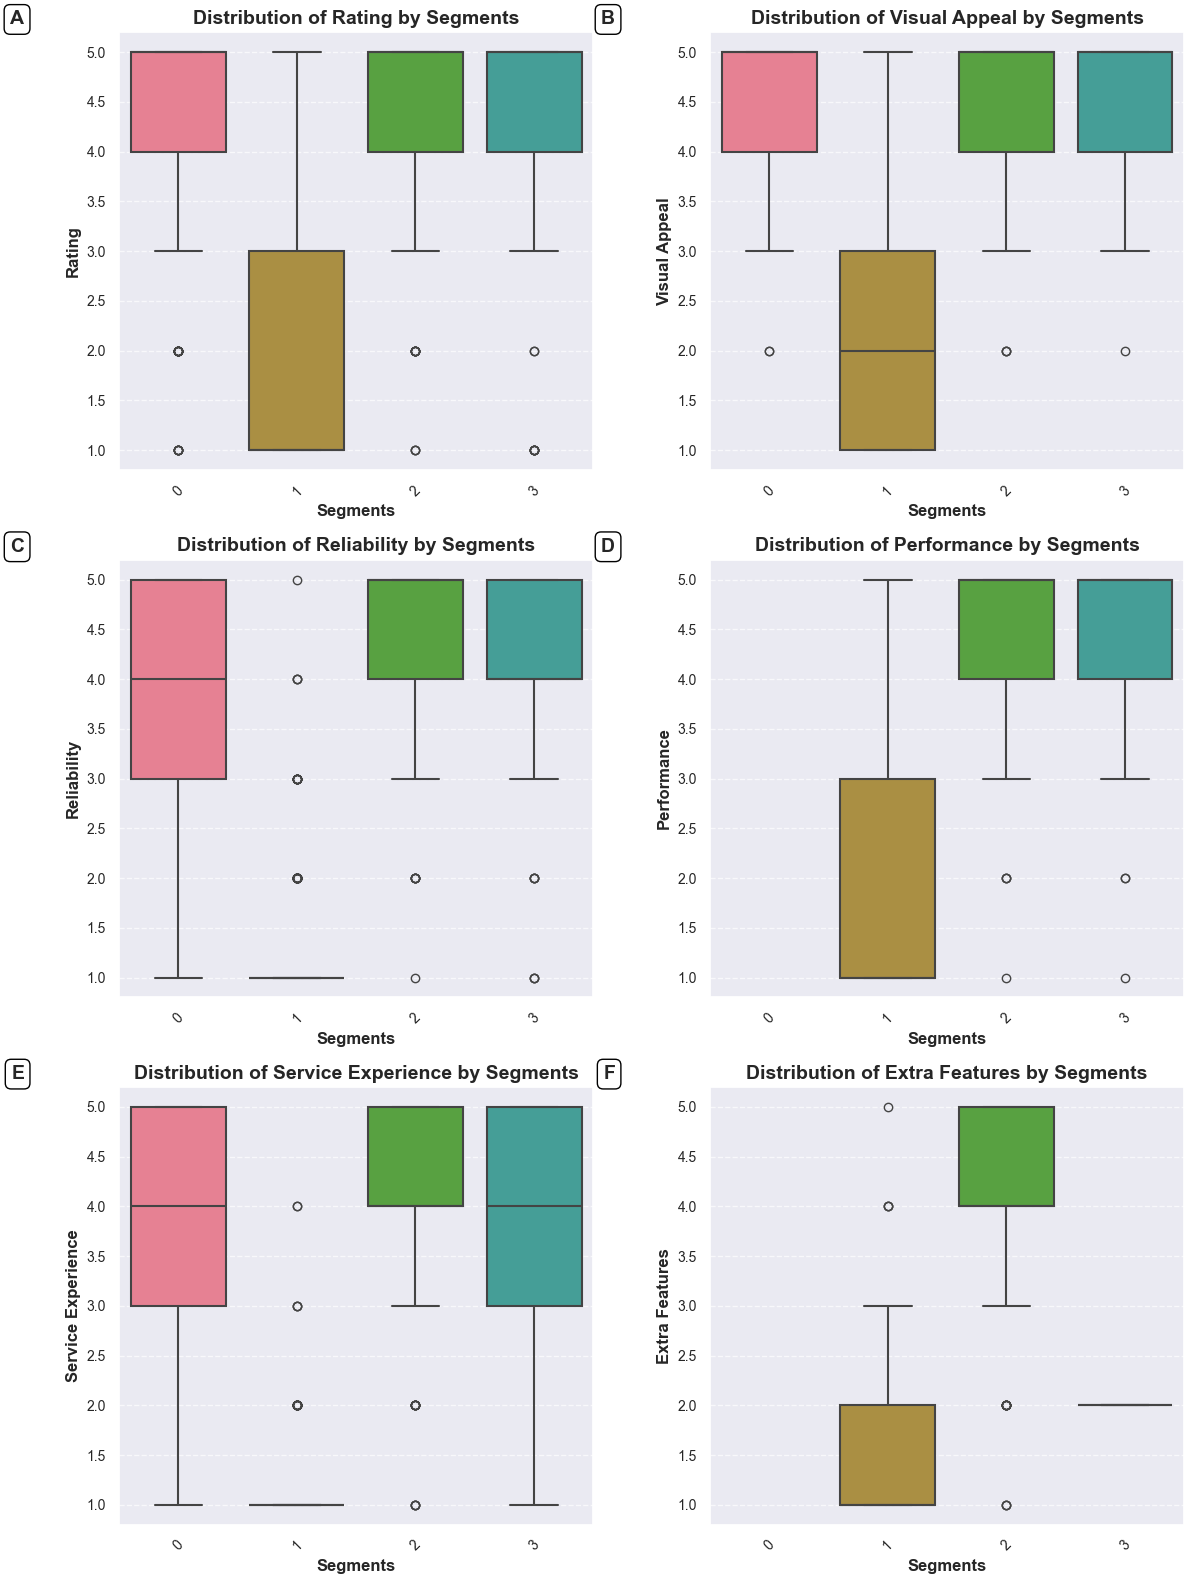

In [71]:
plt.figure(figsize=(12, 16)) 
columns_of_interest = data_describing_segments.columns[-18:-9]
num_subplots = min(len(columns_of_interest), 6)
palette = sns.color_palette('husl', num_subplots)
subplot_labels = ['A', 'B', 'C', 'D', 'E', 'F']

for i in range(num_subplots):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=data_describing_segments, x='cluster', y=columns_of_interest[i], palette=palette, linewidth=1.5)
    
    plt.title(f'Distribution of {columns_of_interest[i]} by Segments', fontsize=14, fontweight='bold')
    plt.xlabel("Segments", fontsize=12, fontweight='bold')
    plt.ylabel(columns_of_interest[i], fontsize=12, fontweight='bold')
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.text(-0.2, 1.05, subplot_labels[i], transform=plt.gca().transAxes,
             fontsize=14, fontweight='bold', va='top', ha='right',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()


The boxplots illustrate that Segment 1 generally has the highest median scores across attributes (Rating, Visual Appeal, Reliability, Performance, Service Experience, Extra Features) but with significant variability. Segment 0 also shows high median scores with less variability. Segments 2 and 3 have moderate scores with some variability. Overall, Segment 1 and Segment 0 tend to rate their electric vehicles more favorably compared to Segments 2 and 3.

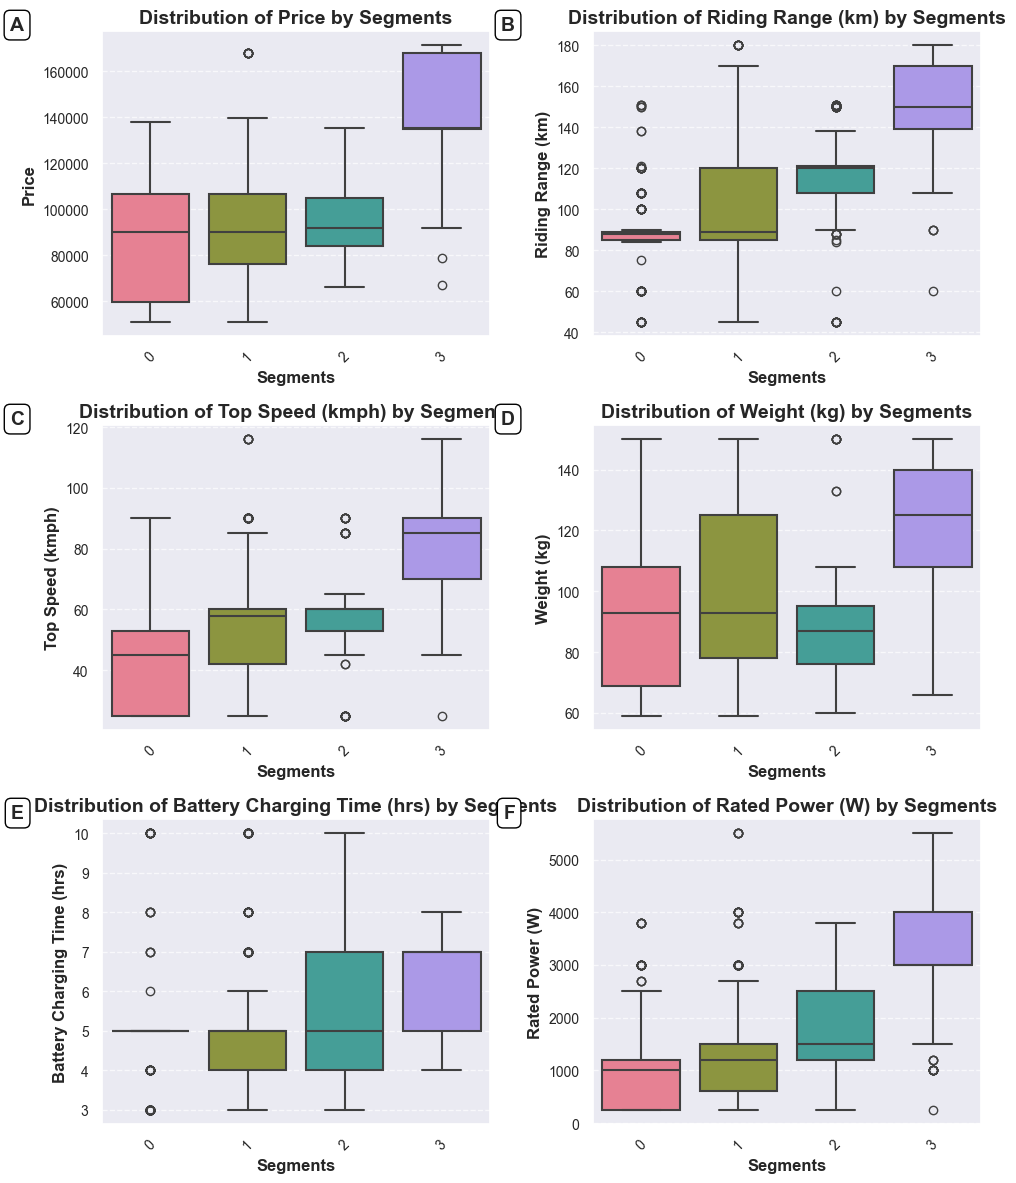

In [72]:
subplot_labels = ['A', 'B', 'C', 'D', 'E', 'F']

plt.figure(figsize=(10, 12))  
for i, col in enumerate(data_describing_segments.columns[-8:-2]):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=data_describing_segments, x='cluster', y=col, palette='husl', linewidth=1.5)
    
    plt.title(f'Distribution of {col} by Segments', fontsize=14, fontweight='bold')
    plt.xlabel("Segments", fontsize=12, fontweight='bold')
    plt.ylabel(col, fontsize=12, fontweight='bold')
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.text(-0.2, 1.05, subplot_labels[i], transform=plt.gca().transAxes,
             fontsize=14, fontweight='bold', va='top', ha='right',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    
plt.tight_layout()
plt.show()


In analyzing the technical specifications of electric vehicles across segments, distinct patterns emerge.

- Segment 3 shows a higher price range, indicating a preference for premium electric vehicles (Figure A). Conversely, Segment 1 focuses on budget-friendly options, while Segments 0 and 2 emphasize affordability with slight variations.

- Segment 3 also stands out with a higher riding range, suggesting a preference for extended range vehicles (Figure B). In contrast, Segments 1 and 0 target moderate ranges suitable for daily commuting, with Segment 2 catering to slightly longer distances.

- For top speed, Segments 3 and 2 favor higher speeds, while Segments 1 and 0 prioritize lower speeds suitable for city commuting (Figure C).

- Weight is another key factor, with Segments 3 and 1 preferring slightly heavier vehicles (Figure D), while Segments 0 and 2 lean towards lighter options.

- Battery charging time shows notable differences, with Segments 3 and 2 preferring longer durations for overnight charging (Figure E), and Segments 1 and 0 opting for faster charging times.

- These technical specifications highlight the nuanced preferences and priorities of each segment, shaping the electric vehicle market in India.

# Selection of the Target Segment

- Target segments identified as Segment 1 (39% of consumers) and Segment 0 (33% of consumers).  

- Segment 1 has diverse preferences and dissatisfaction points, presenting opportunities to improve customer satisfaction and loyalty.  

- Segment 0 values visual appeal, reliability, service experience, and comfort, indicating a need for customization in EVs.  

- Strategy focuses on addressing dissatisfaction points in Segment 1 while enhancing positive attributes in Segment 0.  

- Align electric vehicle offerings with the unique expectations of each segment to ensure competitive advantage and sustained market growth.  

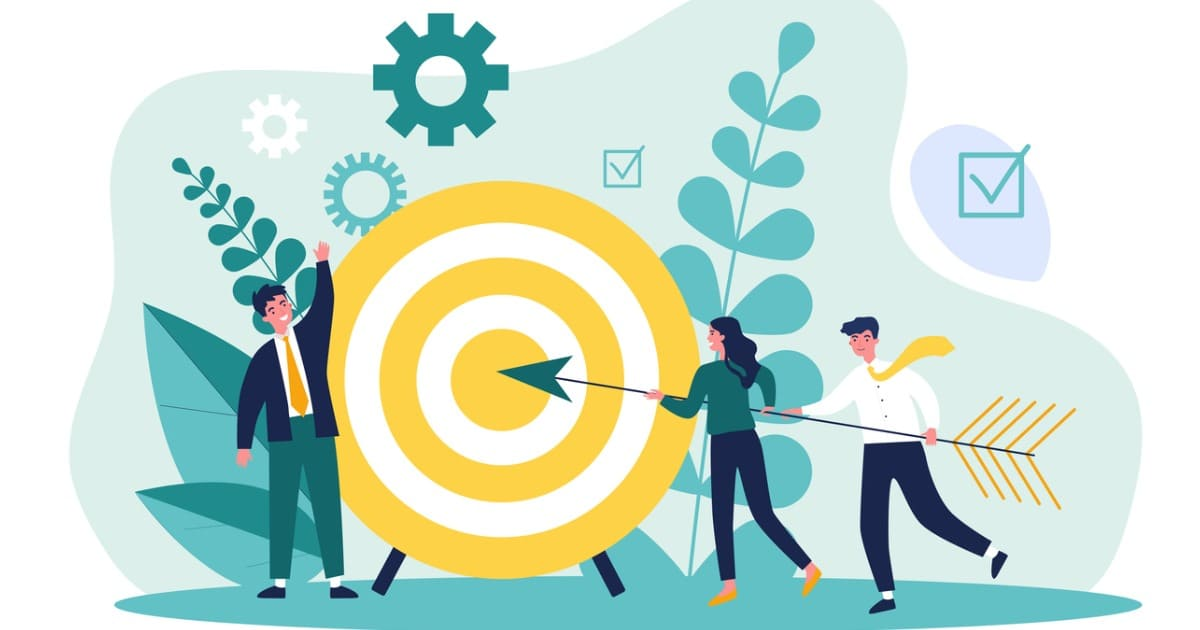

# Customization of Market Mix

In our strategy for the electric vehicle market, customizing the marketing mix is essential to attract Segment 1 and Segment 0, our target groups.

- Customizing products means enhancing features to meet specific needs, tackling issues for Segment 1, and highlighting visual appeal and value for money for Segment 0. This allows us to offer diverse options for different preferences and budgets within each segment.

- Pricing strategies involve setting competitive prices for Segment 1 while applying a slightly higher price for added features in Segment 0.

- Promotion strategies focus on targeted advertising and customized promotional events tailored to the preferences of each segment.

- Distribution strategies involve creating accessible channels in urban areas for Segment 1 and in suburban or semi-urban areas for Segment 0, with a strong focus on online presence and customer support.

- Customizing people and processes includes training customer service representatives to handle specific concerns for each segment and ensuring efficient processes for customization requests and service appointments.

This tailored approach ensures our electric vehicles meet the unique needs of Segment 1 and Segment 0, improving market relevance and customer preference.


Image posted again for clarification

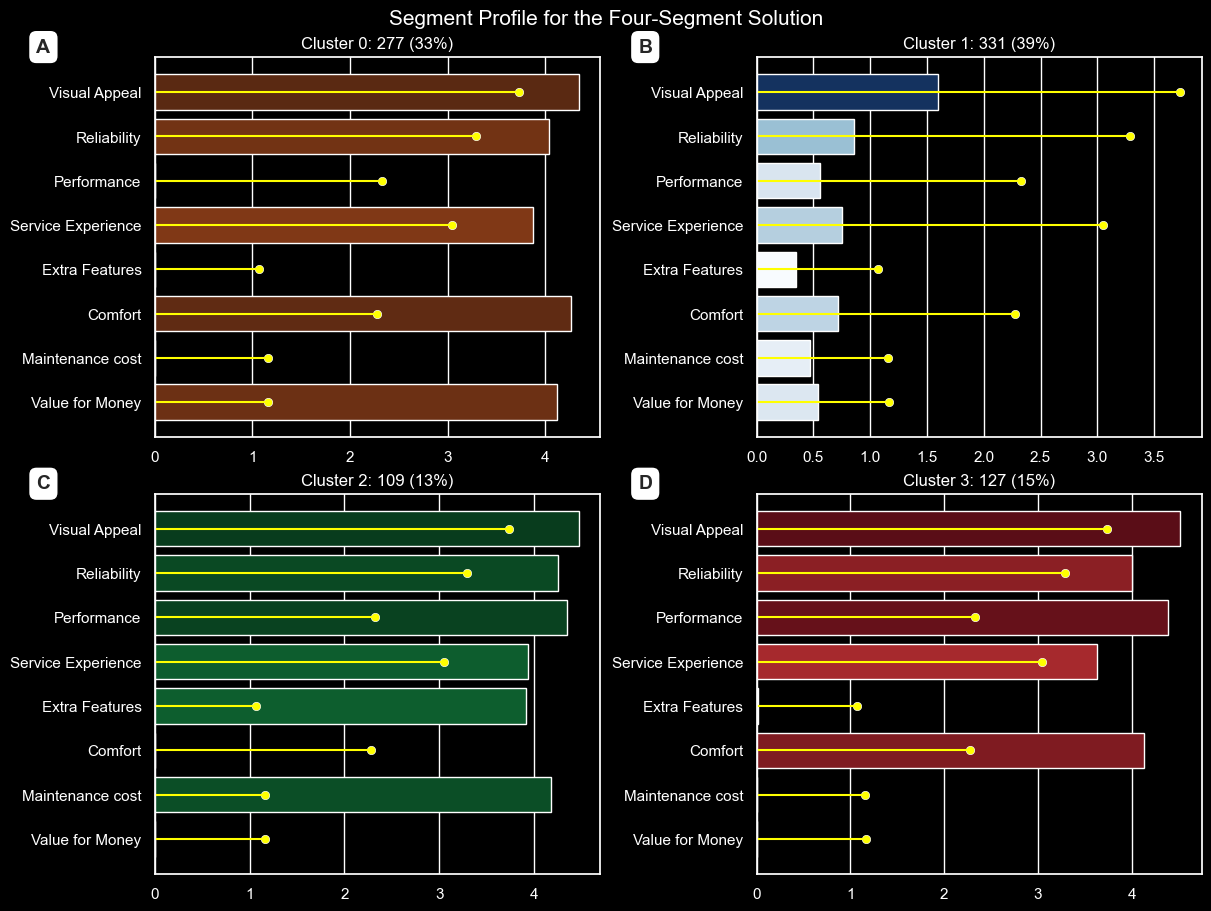

# Potential Early Market Customer Base

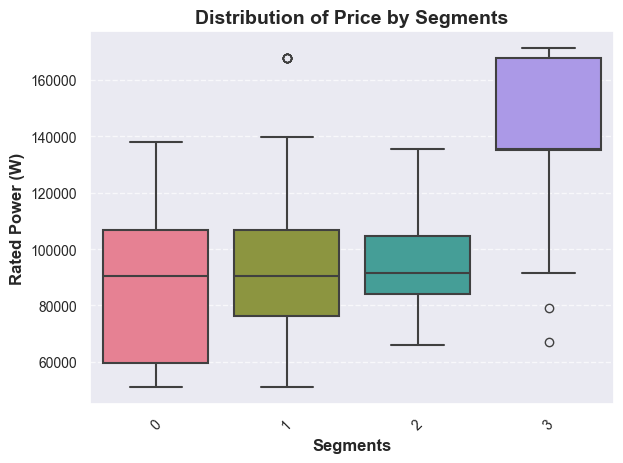

In [73]:
sns.boxplot(data=data_describing_segments, x='cluster', y='Price', palette='husl', linewidth=1.5)
    
plt.title(f'Distribution of Price by Segments', fontsize=14, fontweight='bold')
plt.xlabel("Segments", fontsize=12, fontweight='bold')
plt.ylabel(col, fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [74]:
segment_0 = data_describing_segments[data_describing_segments['cluster'] == 0]
min_price_segment_0 = segment_0['Price'].min()
max_price_segment_0 = segment_0['Price'].max()
segment_1 = data_describing_segments[data_describing_segments['cluster'] == 1]
min_price_segment_1 = segment_1['Price'].min()
max_price_segment_1 = segment_1['Price'].max()

print(f"Segment 0 -----> Min Price: {min_price_segment_0}, Max Price: {max_price_segment_0}")
print(f"Segment 1 -----> Min Price: {min_price_segment_1}, Max Price: {max_price_segment_1}")


Segment 0 -----> Min Price: 51094, Max Price: 137890
Segment 1 -----> Min Price: 51094, Max Price: 167844


- The early market customer base is divided into two primary segments: Segment 1 (331 members, 39% of consumers) and Segment 0 (277 members, 33% of consumers).

- Target price range for Segment 1 is ₹51,094 - ₹1,67,844, 

- Target price range for Segment 0 is ₹51,094 - ₹1,37,890.

Lets take an example

Since we have the number of customers and lets say the target price for each segment, we can find the profit for that segement.

- For segment 1, lets take the target price = 116750, Profit = 3.86 Cr

- For segment 0, lets take the target price = 86796, Profit = 2.4 Cr

Segment 1, being larger in potential market share, is the primary focus for early market penetration efforts due to its significant profit opportunity.

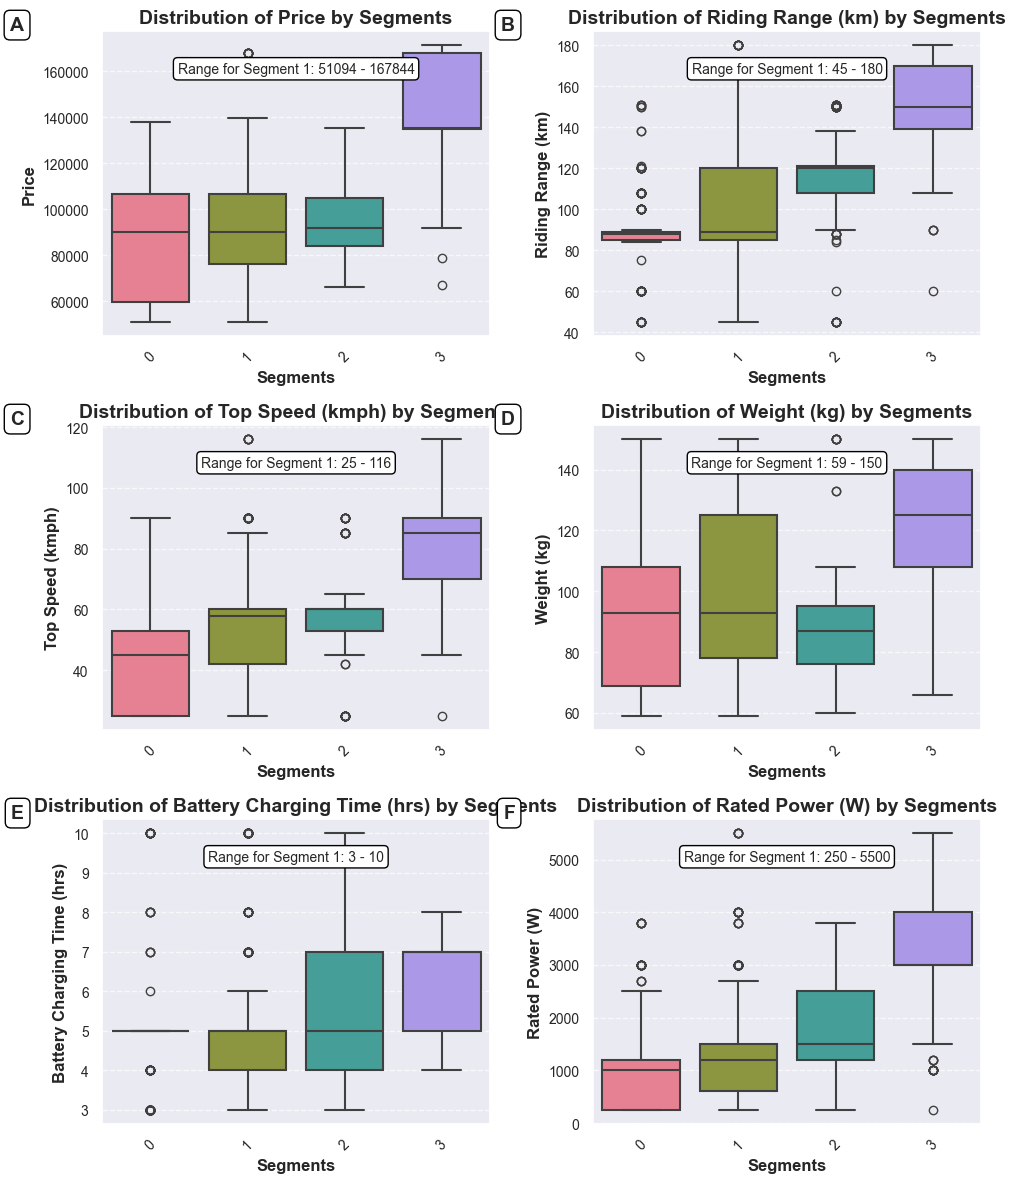

In [75]:
subplot_labels = ['A', 'B', 'C', 'D', 'E', 'F']

plt.figure(figsize=(10, 12))  
for i, col in enumerate(data_describing_segments.columns[-8:-2]):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=data_describing_segments, x='cluster', y=col, palette='husl', linewidth=1.5)
    
    plt.title(f'Distribution of {col} by Segments', fontsize=14, fontweight='bold')
    plt.xlabel("Segments", fontsize=12, fontweight='bold')
    plt.ylabel(col, fontsize=12, fontweight='bold')
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.text(-0.2, 1.05, subplot_labels[i], transform=plt.gca().transAxes,
             fontsize=14, fontweight='bold', va='top', ha='right',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    
    segment_1_data = data_describing_segments[data_describing_segments['cluster'] == 1][col]
    segment_1_range = f"Range for Segment 1: {segment_1_data.min()} - {segment_1_data.max()}"
    plt.text(0.5, 0.9, segment_1_range, transform=plt.gca().transAxes,
             fontsize=10, va='top', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    
plt.tight_layout()
plt.show()


# Most Optimal Market Segments

| **Attribute**           | **Segment 1**              |
|-------------------------|----------------------------|
| **Consumer Percentage** | 39%                        |
| **Price Range**         | ₹51,094 to ₹1,67,844      |
| **Riding Range**        | 45 to 180 km               |
| **Top Speed**           | 25 to 116 kmph             |
| **Weight**              | 59 to 150 kg               |
| **Battery Charging Time** | 3 to 10 hours             |
| **Rated Power**         | 250 to 5500 W             |


# Conclusion

- **Target Segment:**
  - Segment 1 identified as the optimal target for electric two-wheelers.
  - Represents 39% of consumers, indicating substantial market opportunity.
  
- **Product Alignment:**
  - Tailored specifications to meet segment preferences in price, riding range, top speed, weight, battery charging time, and rated power.
  
- **Strategic Focus:**
  - Ensures products align with the demands of a large customer base.
  - Provides a solid foundation for successful market entry.

- **Market Relevance:**
  - Approach equips us to resonate effectively within India's evolving electric vehicle landscape.
